# Project Name: Flight Price Prediction.

### Project Type: Regression
### Contribution: Aarti Salunkhe

## Project Overview

Flight ticket prices fluctuate due to various factors such as demand, airline policies, seasonality, and travel dates. Machine learning models can analyze historical trends and predict future prices to help both travelers and airlines make informed decisions.

#### For travelers: 
Planning trips becomes difficult because prices keep changing.
#### For airlines: 
Setting competitive and profitable prices is a complex task.

## Problem Statement

Flight ticket prices change frequently its difficult for travelers to plan their trips. For example, the price of a ticket today might be different tomorrow for the same flight. This project aims to use machine learning to predict flight ticket prices accurately. By analyzing flight data, we can understand the factors that affect ticket prices and help both travelers and airlines make better decisions.

## Domain Analysis

The aviation industry operates in a dynamic environment where ticket prices are influenced by various factors. Airlines use dynamic pricing strategies to adjust fares based on demand, route popularity, operational costs, and other external factors. Predicting flight fares is challenging due to this variability, but analyzing historical data can provide meaningful insights.

## Objective

The primary objective of this project is to predict flight ticket prices accurately using machine learning techniques. By analyzing historical flight data.

In [11]:
#load all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import math
import pickle

## Dataset Loading

In [13]:
import pandas as pd
df = pd.read_excel('Flight_Fare.xlsx', engine='openpyxl')

## Display the first few rows

In [15]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## column Overview

- 1. Airline: this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
- 2. Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
- 3. Source: This column holds the name of the place from where the passenger’s journey will start.
- 4. Destination: This column holds the name of the place to where passengers wanted to travel.
- 5. Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
  6. Dep_Time:This column specifies the exact time of the flight's departure from the source location. 
- 7. Arrival_Time: Arrival time is when the passenger will reach his/her destination.
- 8. Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
- 9. Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
- 10. Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
- 11. Price: Price of the flight for a complete journey including all the expenses before onboarding.  

### check last 3 rows

In [19]:
df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


This dataset involves predicting a continuous numerical value (price), so the problem is a regression task.
Price column is our target variable.

In [21]:
df.shape,df.size

((10683, 11), 117513)

### Check the columns 

In [23]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Here we can get more information about our dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- insight : above the info
- the dataset has total 10,683 (0 to 10,682) Rows and 11 columns.
- Route and Total_Stops have 1 missing value each. Needs cleaning or imputation.
- we have 1 numerical column (price) this is our target variable and other 10 columns are catagorical.
- memory usage: 918.2+ KB    

### we will check seperately data types

In [28]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [29]:
#here we can see Date_of_Journey, Dep_Time, and Arrival_Time are in object format. They need to be converted to a datetime type

### Get a statestical info from the numerical columns

In [31]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### insight :
- The total 10,683 price entries.
- The average price : 9087.06 (most flights are around this cost)
- the minimum price range : 1759 (cheapest flight).
- the maximun price range : 79512 (most expensive flight).
- 25% flights price: 5,277
- 50% flights Cost : 8372
- 75% flights Cost: 12373

### Get a statestical info from the catagorical columns

In [34]:
df.describe(include = 'O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### insights : 
- most columns have 10,683 count, except Route and Total_Stops, which have one missing value each.
- Top airline : Jet Airways operates the most flights.
- most Popular Travel Date: 18/05/2019 has the highest number of flights.
- most Common Source and Destination: Most flights are from Delhi to Cochin.
- most of Frequent Route: DEL → BOM → COK (Delhi → Mumbai → Cochin) is the most taken route.
- Route: DEL → BOM → COK is the most common (2,376 flights).
- Duration: 2h 50m appears most often (550 flights).
- Stops: 1 stop is the most frequent (5,625 flights).
- most of 8,345 flights have "No info" provided.

### now we will see total unique for each column

In [37]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Now while using the IsNull function and sum function we will see the number of null values in our dataset

In [39]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [40]:
# fill missing values
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [41]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- here can see now our data is cleaned.
- Route and Total_Stops columns are handled miising values with mode. this is best for catagorical variables.           

In [43]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Checking the data curruption

In [45]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Check for duplicate rows

In [47]:
df.duplicated().sum()

220

In [48]:
# Display the duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [49]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print(df.duplicated().sum())


0


In [50]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

- Airline: 12 unique airlines.
- Source: 5 unique departure cities.
- Destination: 6 unique arrival cities.
- Total_Stops: 5 unique values, indicating the number of stops in the journey.
- Additional_Info: 10 unique values providing extra journey details.

In [52]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [53]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Date and Time Features:
- Date_of_Journey, Dep_Time, Arrival_Time: Represent journey and time information; these will be converted into datetime format for feature extraction.

### Date_of_Journey: Here we are converting Date_of_Journey into day and month

In [56]:
# Convert 'Date_of_Journey' to datetime and extract day and month
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

### Dep_Time: Here we are converting departure time into hours and minutes

In [58]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime and extract hour and minute
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

### Arrival_Time: we are converting the arrival time into hours and minutes.

In [60]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

## Duration Feature:

### here we process the Duration column to extract the total journey time in minutes.

In [63]:
# Convert 'Duration' into total minutes
def convert_duration(duration):
    duration = duration.split()
    hours = int(duration[0][:-1]) if 'h' in duration[0] else 0
    minutes = int(duration[1][:-1]) if len(duration) > 1 else 0
    return hours * 60 + minutes

In [64]:
df['Duration_Minutes'] = df['Duration'].apply(convert_duration)

In [65]:
# Drop original datetime columns to avoid redundancy (optional)
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], inplace=True)

In [66]:
# Display the updated dataset
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140


In [67]:
df.shape

(10463, 14)

In [68]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int32
Journey_Month        int32
Dep_Hour             int32
Dep_Minute           int32
Arrival_Hour         int32
Arrival_Minute       int32
Duration_Minutes     int64
dtype: object

## EDA (Explorarory Data Analysis)¶

## Univariate Analysis

## Plot for 'Airline' column

In [72]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

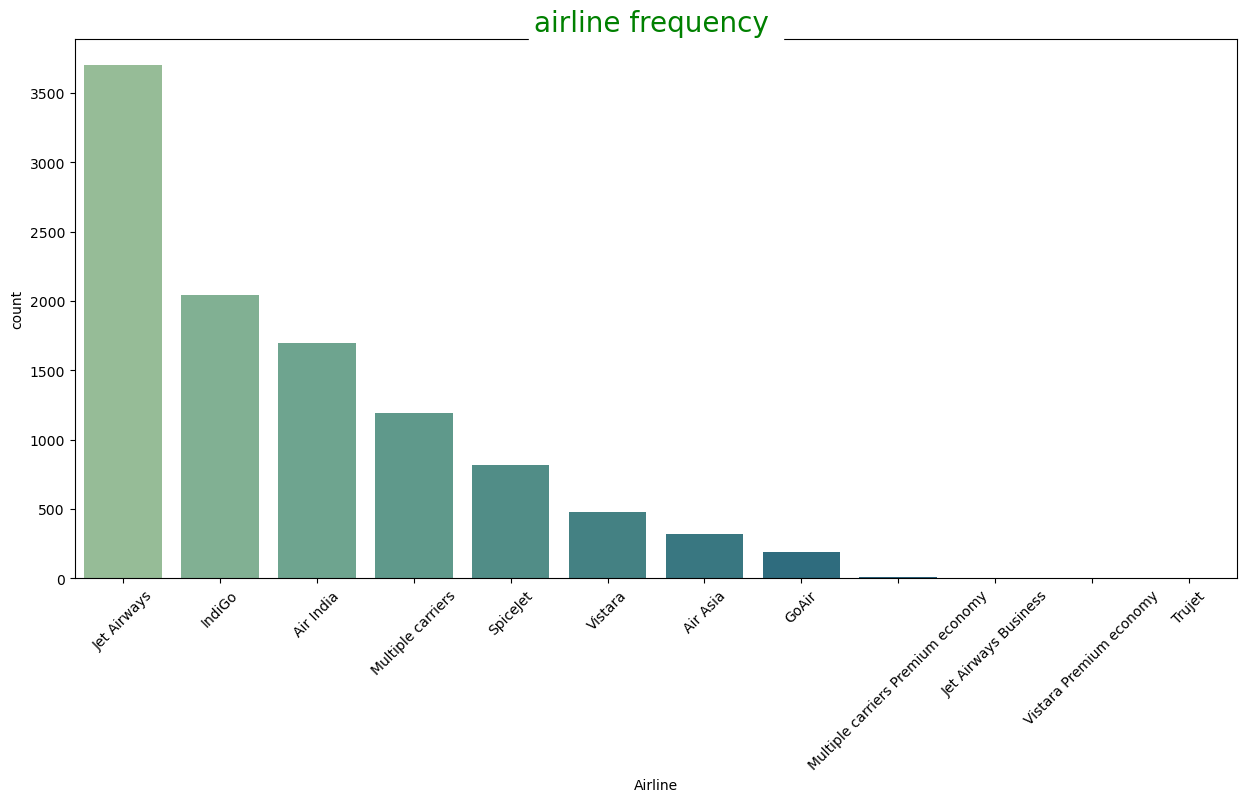

In [73]:
plt.figure(figsize=(15,7))
chart=sns.countplot(x='Airline',data=df,palette='crest', order = df['Airline'].value_counts().index)
plt.title("airline frequency ",
          fontsize='20',
          backgroundcolor='white',
          color='green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

insight : we can show here Jet Airways has the highest number of flights,then second highest is IndiGo.

###  Count plot for the 'Source' column

In [76]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

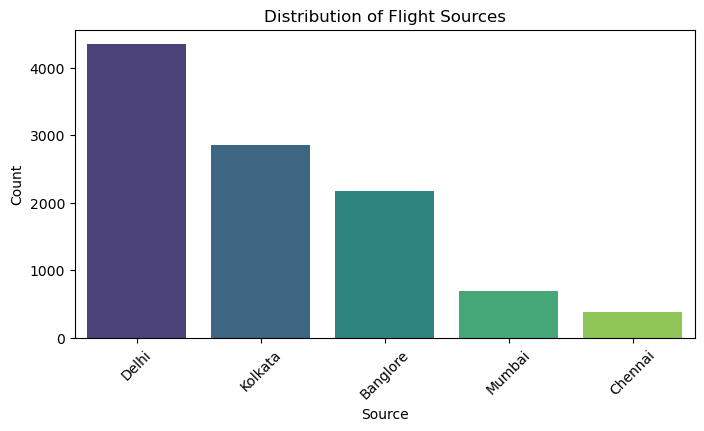

In [77]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Source', order=df['Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Flight Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can show here most flights start from Delhi kolkata and banglore ,the fewest flights start from channai and mumbai.

### Count plot for Destination

In [80]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='count'>

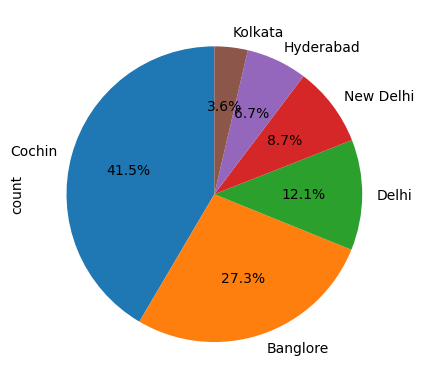

In [81]:
df['Destination'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

- We can see here that Bangalore and Cochin are the most popular destinations with the highest number of arriving flights. 
- Delhi and New Delhi also shows frequently number of arriving flights, making them common destinations. However, Hyderabad and Kolkata have fewer flights arriving.

## Count plot for Route

In [84]:
route_counts = df['Route'].value_counts()
print(route_counts)

Route
DEL → BOM → COK          2377
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64


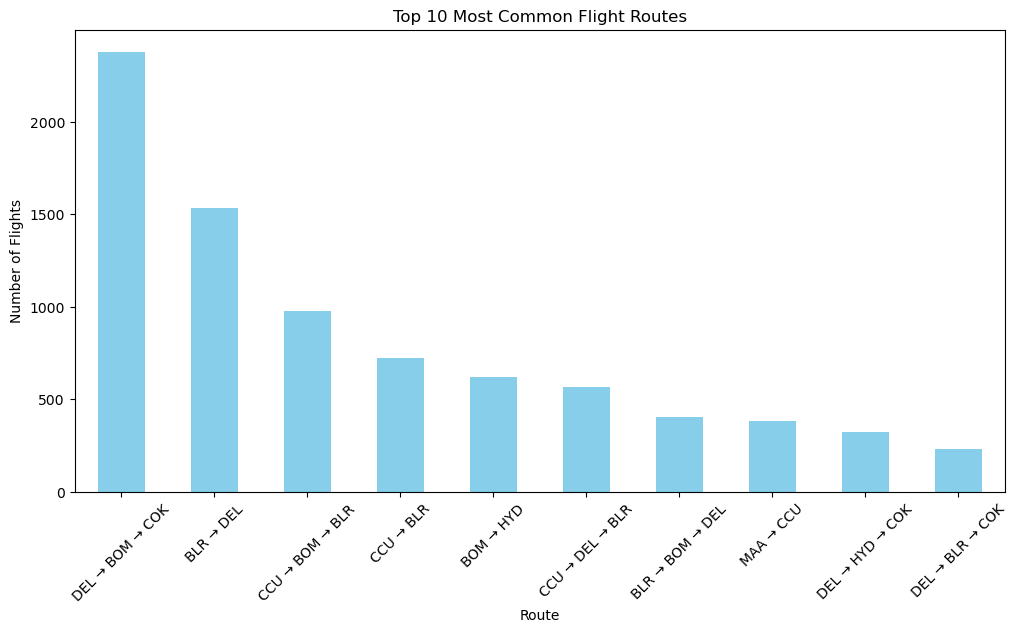

In [85]:
plt.figure(figsize=(12, 6))
route_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Flight Routes')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

- The dataset contains multiple unique routes for flights
- The bar chart shows the top 10 most common routes

### plot for total stop column

In [88]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#### Here is some info about Total_Stops column:

In [90]:
#The Total_Stops column indicates how many times a flight stops before reaching its destination.
#Non-stop: The flight goes directly to the destination without stopping.
#1 stop: The flight makes one break or stop at another airport before reaching the destination.
#2 stops: The flight makes two breaks or stops at other airports.
#3 stops: The flight makes three breaks or stops at other airports

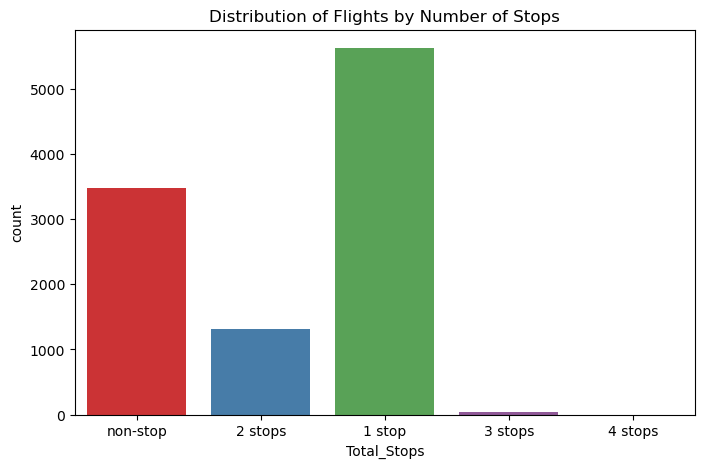

In [91]:
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = 'Total_Stops', palette = 'Set1')
plt.title('Distribution of Flights by Number of Stops')
plt.show()

- The data shows highest number of flights are (1 stop and non-stop) before reaching the destination:
- 1 stop means the flight makes one break at another airport before reaching the destination.
- Non-stop means the flight goes directly to the destination without any breaks.
- Flights with 2 or more stops are fewer flights we will compare with price in next analysis..

### plot for Additional_ Info column 

In [94]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

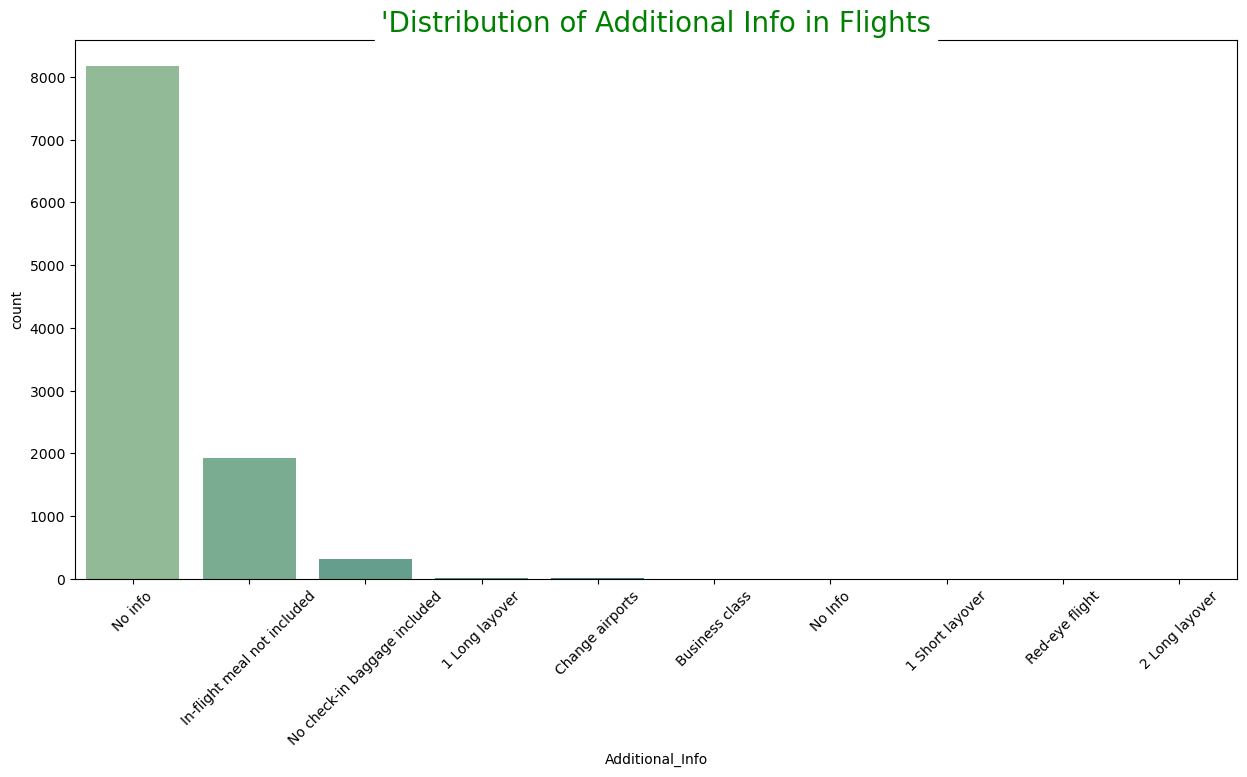

In [95]:
plt.figure(figsize=(15,7))
chart=sns.countplot(x='Additional_Info',data=df,palette='crest', order = df['Additional_Info'].value_counts().index)
plt.title("'Distribution of Additional Info in Flights",
          fontsize='20',
          backgroundcolor='white',
          color='green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

### insight:
- Most flights have "No info" in the Additional_Info column, meaning no extra information is provided.
- Other details, like in-flight meals or baggage details, are mentioned for only a few flights.
- This indicates that the majority of flights do not include specific additional services

## plot for Price column

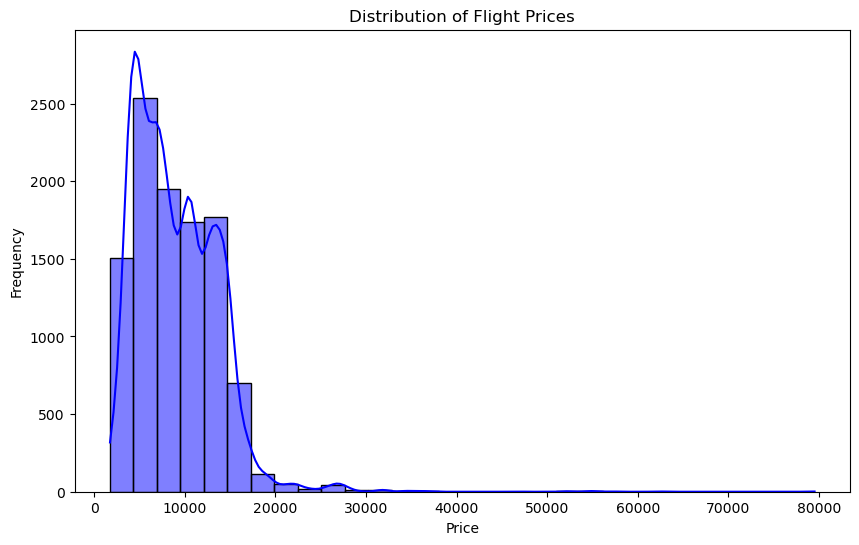

In [98]:
plt.figure(figsize =(10,6))
sns.histplot(df['Price'],kde = True,color = 'blue',bins = 30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()           

- this plot shows most of flights are priced in lower ranged but Some fewer flights having higher prices.
- This indicates that affordable flights are more common, while premium-priced flights are limited 
- this column shows extreme outliers prsent and the distribution is positively skewed (tail on the right side).

In [100]:
df['Price'].skew()

1.8576412037679872

lets start to plots for columns Journey_Day, Journey_Month, Dep_Hour,	Dep_Minute	,Arrival_Hour,	Arrival_Minute,	Duration_Minutes

### plot for Journey_Day column

In [103]:
df['Journey_Day'].value_counts()

Journey_Day
9     1375
6     1269
27    1092
21    1085
1     1058
24    1022
15     967
12     946
3      835
18     814
Name: count, dtype: int64

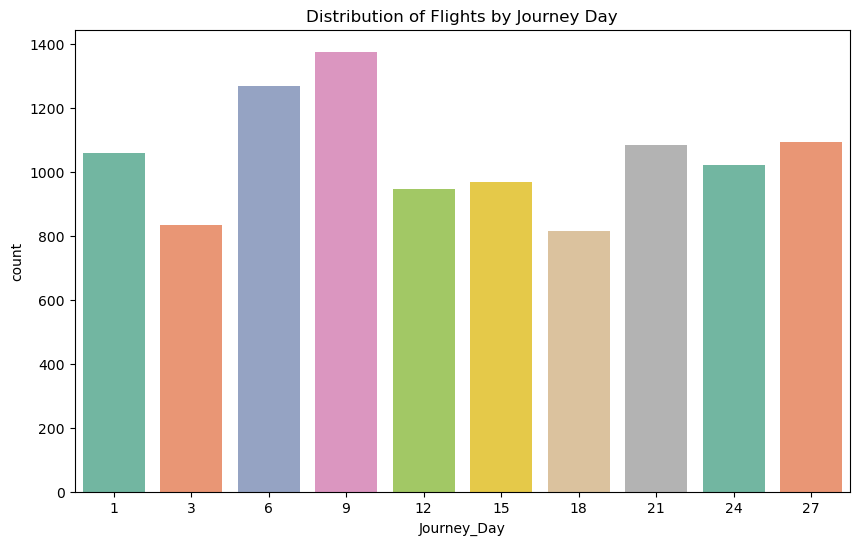

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Journey_Day', palette='Set2')
plt.title('Distribution of Flights by Journey Day')
plt.show()

the uniform distribution is showing which days of the month flights are booked,and we can see here most of days are even..

### plot for Journey_Month column

In [107]:
df['Journey_Month'].value_counts()

Journey_Month
5    3396
6    3311
3    2678
4    1078
Name: count, dtype: int64

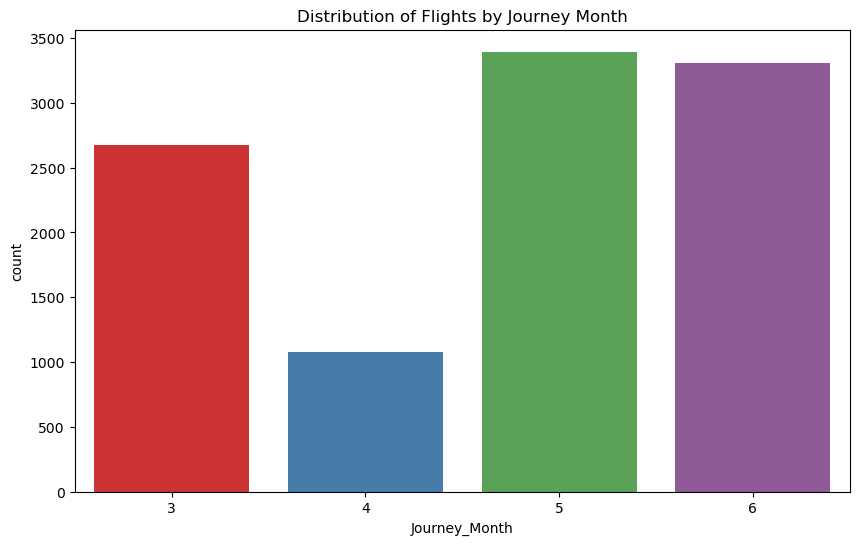

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Journey_Month', palette='Set1')
plt.title('Distribution of Flights by Journey Month')
plt.show()

The Journey_Month column shows the months when flights are scheduled. 

### plot for Dep_Hour column

In [111]:
df['Dep_Hour'].value_counts()

Dep_Hour
9     887
7     863
8     694
17    689
6     675
20    649
5     582
11    579
19    544
10    527
14    505
21    489
16    461
18    441
13    411
22    373
15    319
2     194
12    178
4     169
23    133
0      40
1      37
3      24
Name: count, dtype: int64

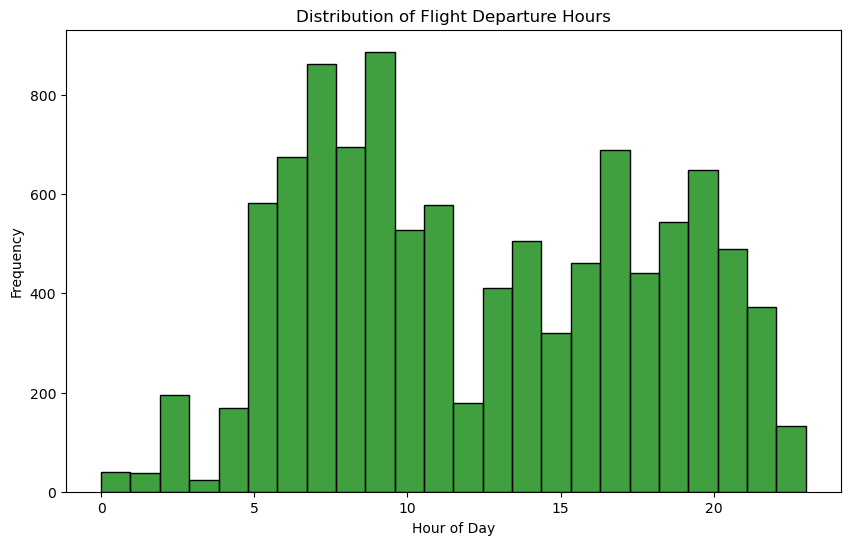

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Dep_Hour'], kde=False, color='green', bins=24)
plt.title('Distribution of Flight Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

### plot for Dep_Minute column

In [114]:
df['Dep_Minute'].value_counts()

Dep_Minute
0     2039
30    1173
55    1052
10     870
45     858
5      740
15     684
25     679
20     664
35     645
50     586
40     473
Name: count, dtype: int64

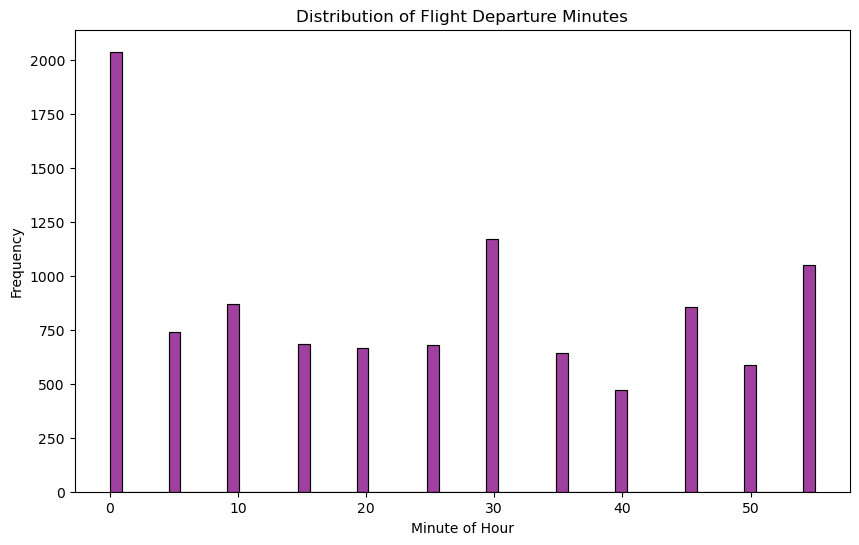

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Dep_Minute'], kde=False, color='purple', bins=60)
plt.title('Distribution of Flight Departure Minutes')
plt.xlabel('Minute of Hour')
plt.ylabel('Frequency')
plt.show()

### plot for Arrival_Hour column

In [117]:
df['Arrival_Hour'].value_counts()

Arrival_Hour
19    1554
12     861
4      761
21     701
22     646
1      525
18     509
9      490
23     481
10     474
8      468
7      414
20     377
16     370
0      322
13     303
11     297
14     294
17     191
15     182
2       79
5       66
6       51
3       47
Name: count, dtype: int64

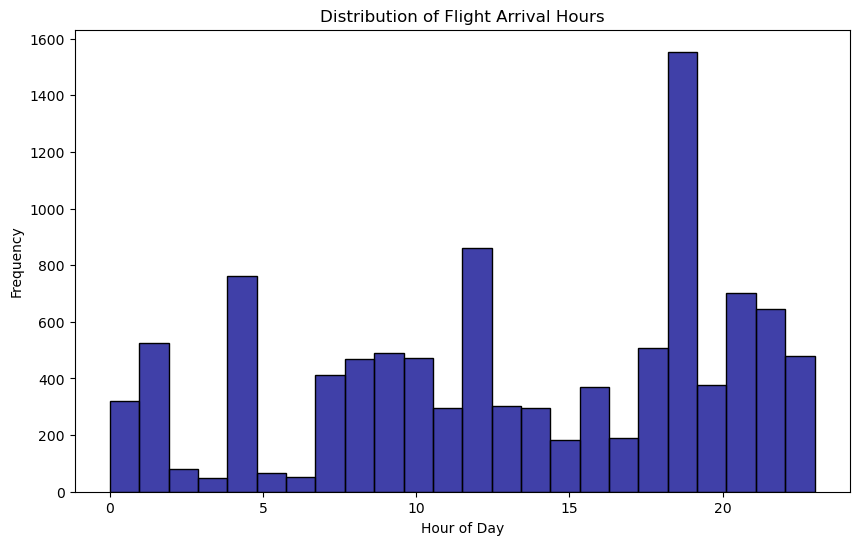

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Arrival_Hour'], kde=False, color='darkblue', bins=24)
plt.title('Distribution of Flight Arrival Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


### plot for Arrival_Minute column

In [120]:
df['Arrival_Minute'].value_counts()

Arrival_Minute
0     1417
15    1245
25    1225
35    1070
20     894
30     831
50     744
45     689
5      659
40     626
10     576
55     487
Name: count, dtype: int64

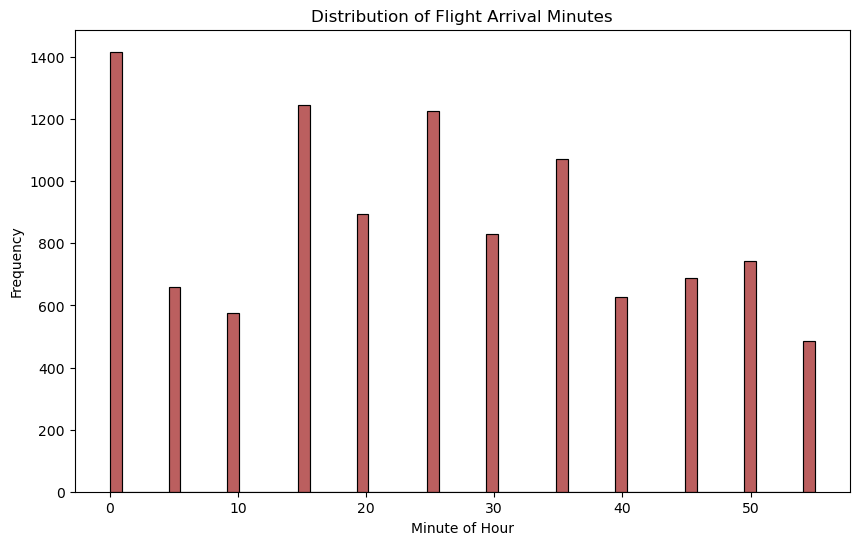

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Arrival_Minute'], kde=False, color='brown', bins=60)
plt.title('Distribution of Flight Arrival Minutes')
plt.xlabel('Minute of Hour')
plt.ylabel('Frequency')
plt.show()


### plot for Duration_Minutes column

In [123]:
df['Duration_Minutes'].value_counts()

Duration_Minutes
170     544
90      386
165     335
175     332
155     329
       ... 
1825      1
1815      1
2525      1
1735      1
2860      1
Name: count, Length: 368, dtype: int64

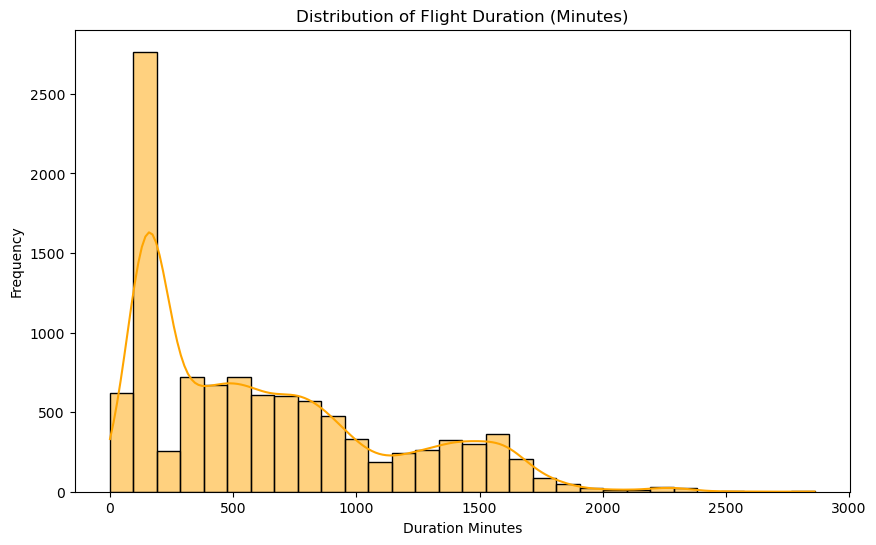

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], kde=True, color='orange', bins=30)
plt.title('Distribution of Flight Duration (Minutes)')
plt.xlabel('Duration Minutes')
plt.ylabel('Frequency')
plt.show()


Most flights have normal durations.
A few flights take much longer, likely due to stops or delays.
Outliers present in this column
will see the relationship between each in next step: 

## Bivariate Analysis

### Analyze the relationship between duration and price.

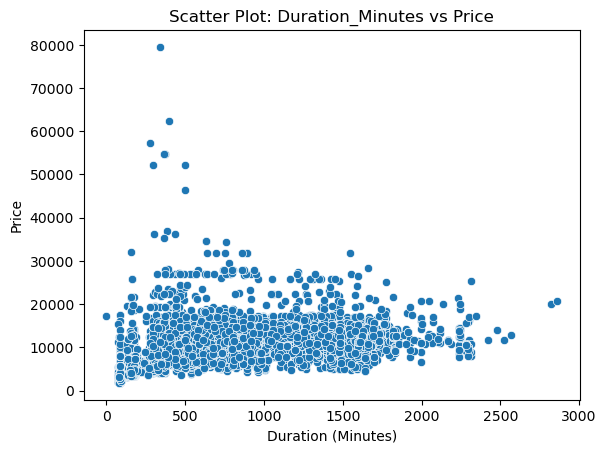

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Duration_Minutes and Price
sns.scatterplot(data=df, x='Duration_Minutes', y='Price')
plt.title('Scatter Plot: Duration_Minutes vs Price')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')
plt.show()

### insight :
- this plot shows the relationship between how long a flight is and how much it cost.
- the plots shows the dots are spread out all over the graph which means there is no strong relationship between duration and price.
- there are few flights in less duration with higher expensive.
- the majority of flights in the dataset are less than 2000 minutes long .

## Journey_Day vs Price

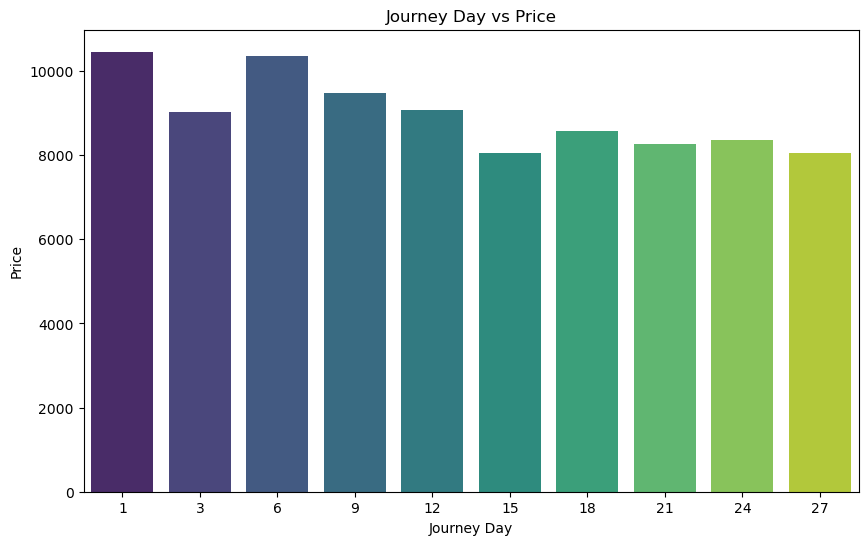

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Journey_Day', y='Price', ci=None, palette='viridis')
plt.title('Journey Day vs Price')
plt.xlabel('Journey Day')
plt.ylabel('Price')
plt.show()

- might be higher prices due to incerased demand on weekends.
- some days might higher prices due to festivals ,holidays.

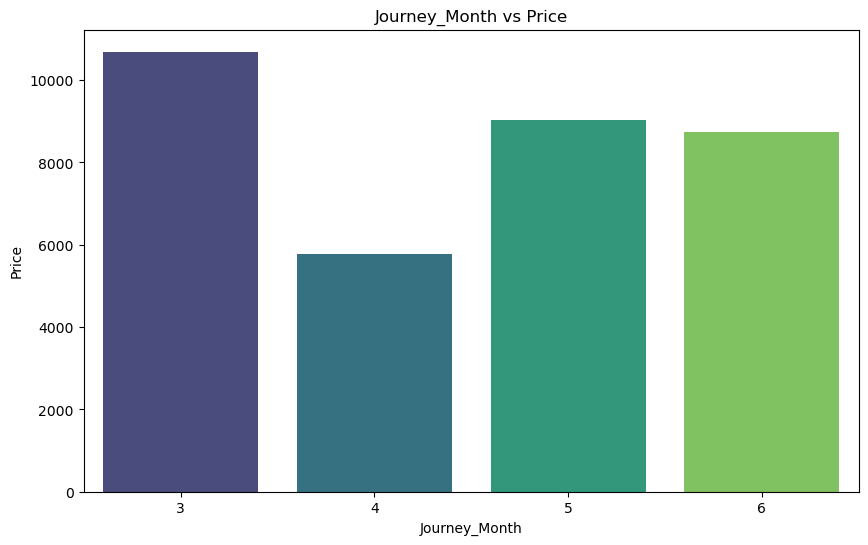

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Journey_Month', y='Price', ci=None, palette='viridis')
plt.title('Journey_Month vs Price')
plt.xlabel('Journey_Month')
plt.ylabel('Price')
plt.show()

- prices may increases due to holidays and festivals.
- prices may decreases due to off-season months that's why prices could be lower.

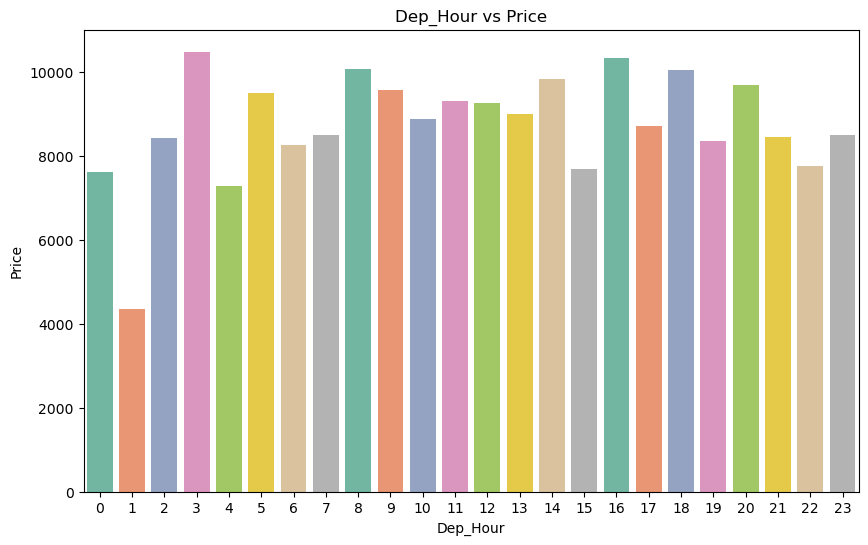

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Dep_Hour', y='Price', ci=None, palette='Set2')
plt.title('Dep_Hour vs Price')
plt.xlabel('Dep_Hour')
plt.ylabel('Price')
plt.show()

Early morning and late-night flights may have lower prices.

In [137]:

df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445


## Airline vs Price

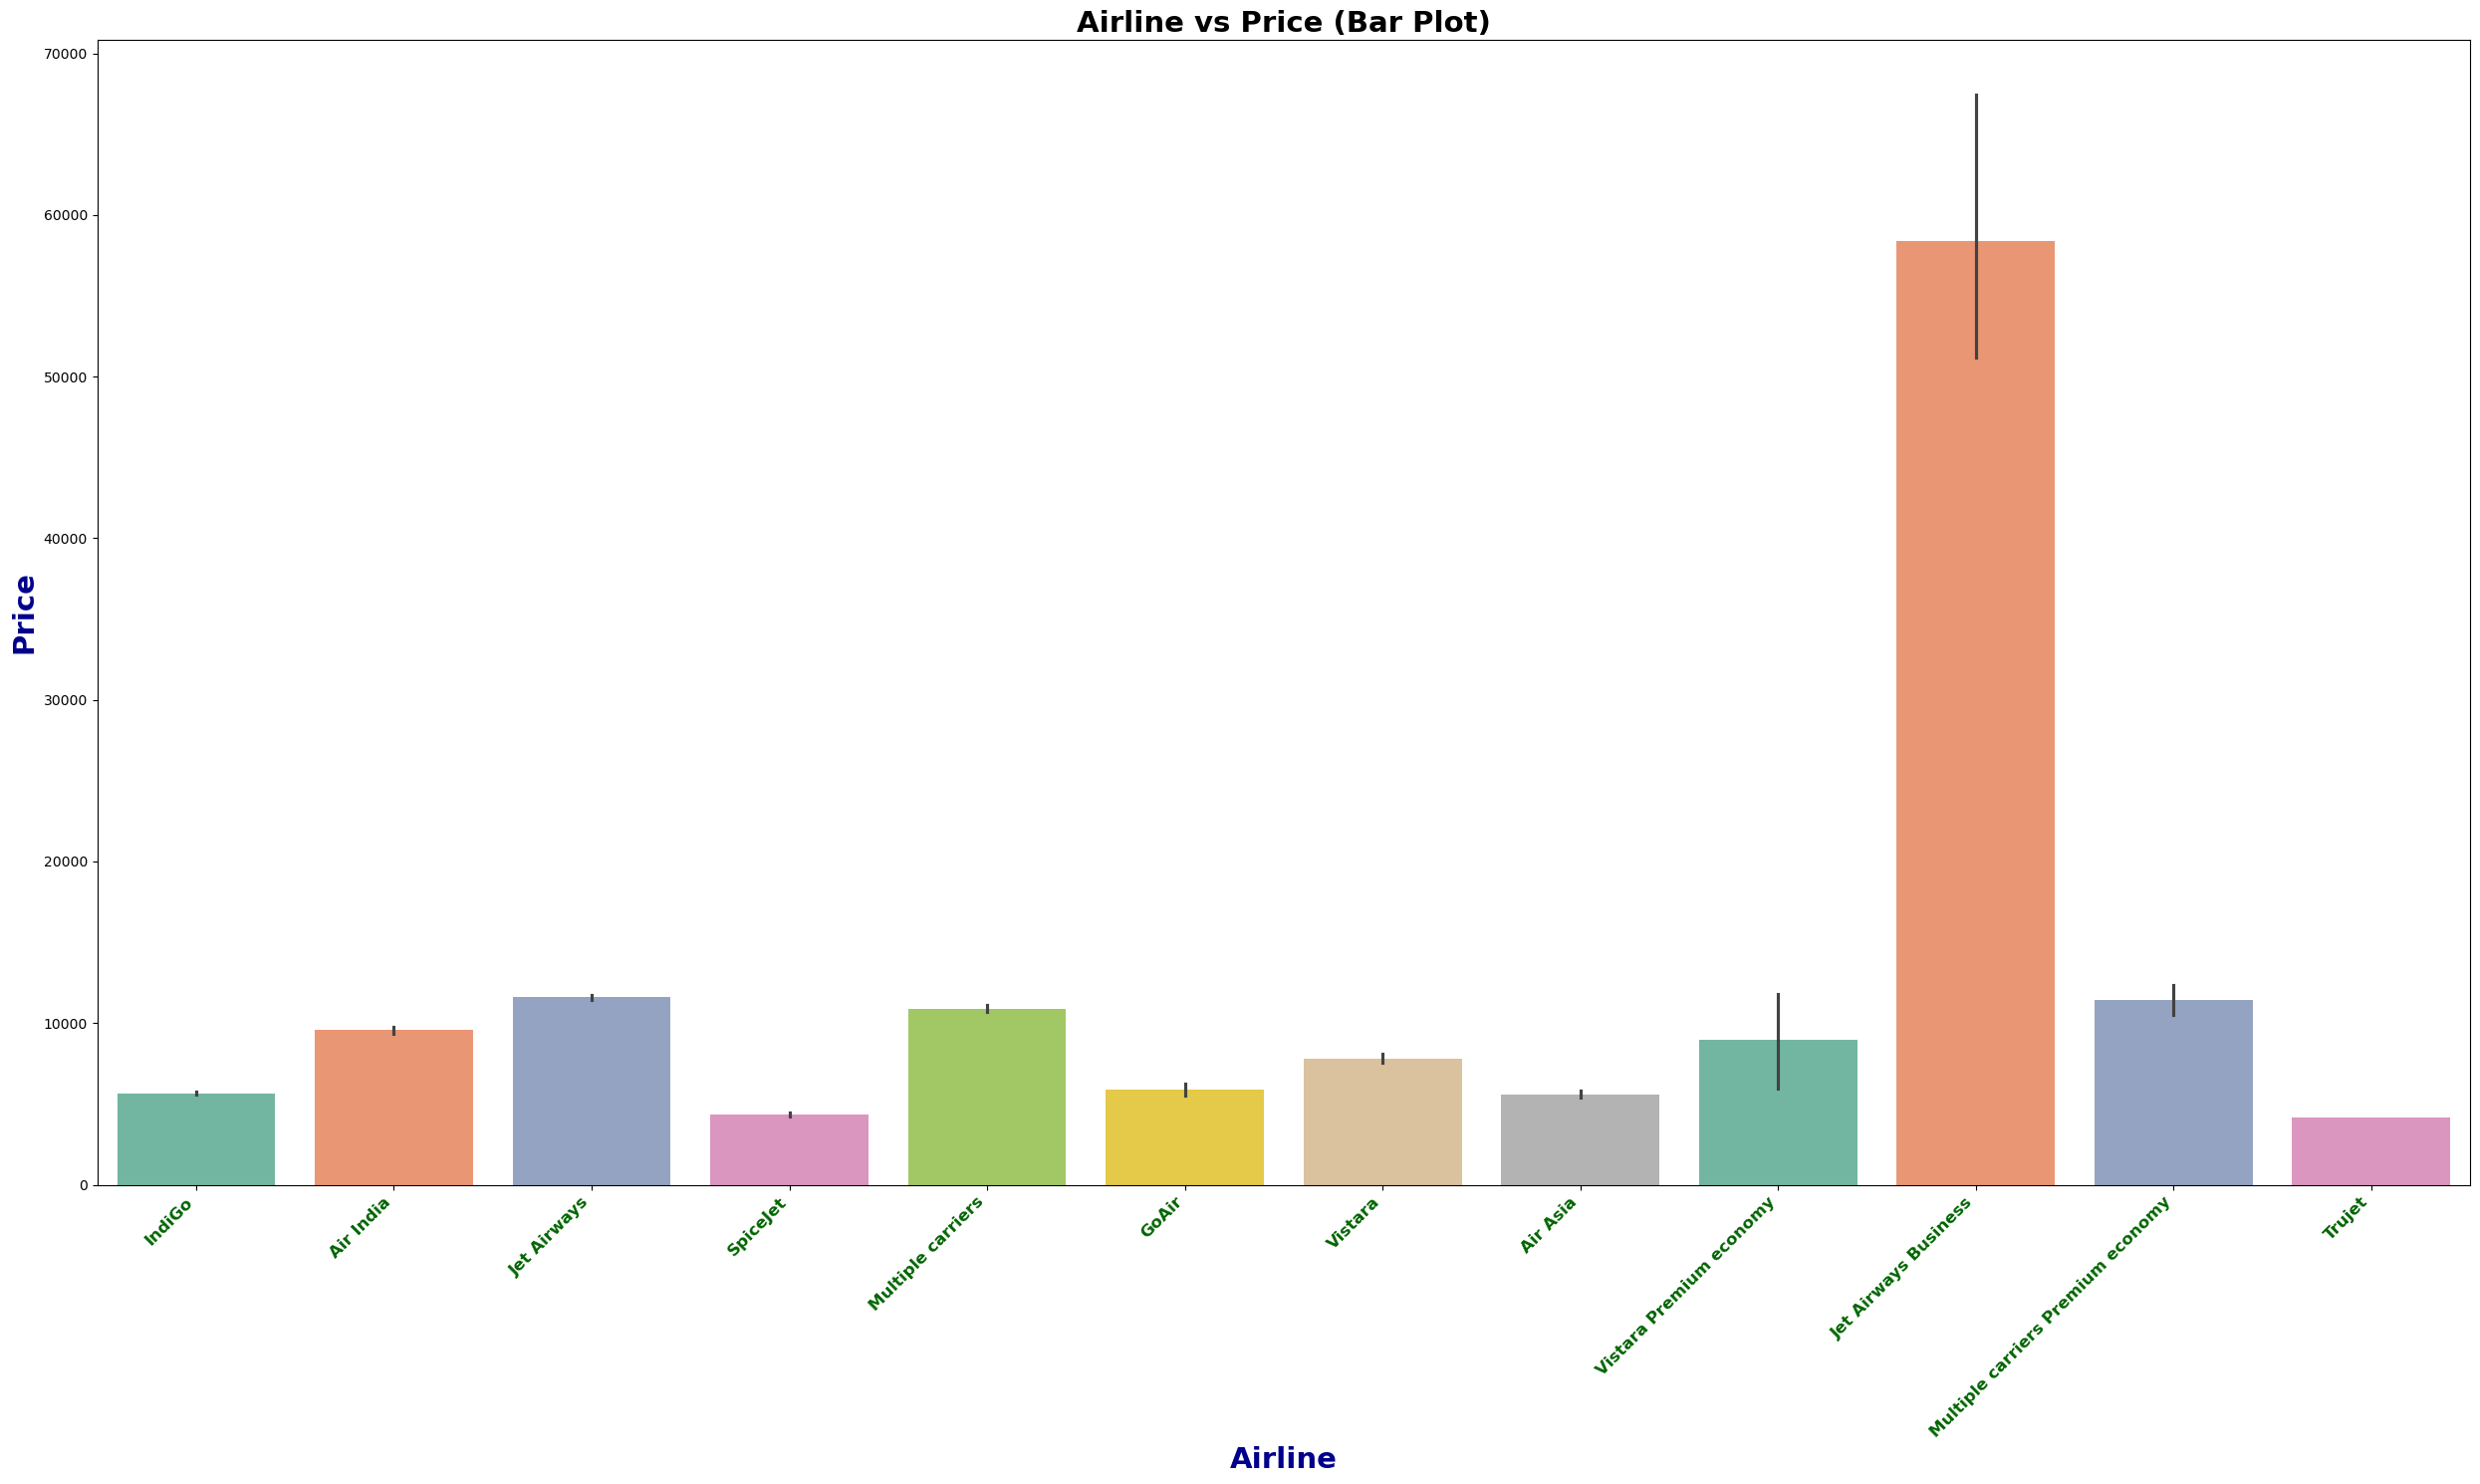

In [139]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Airline', y='Price', data=df, palette='Set2')

# Customize the chart with title and labels
plt.title('Airline vs Price (Bar Plot)', fontsize=21, weight='bold', color='black')
plt.xlabel('Airline', fontsize=21, weight='bold', color='darkblue')
plt.ylabel('Price', fontsize=21,weight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold', color='darkgreen')

# Show the plot
plt.tight_layout()
plt.show()

- the plot shows Jet Airways Business has the highest average ticket price
- Airlines like Jet Airways, Multiple Carriers, and Vistara Premium Economy have medium pricing. 
- Airlines such as IndiGo, SpiceJet, and AirAsia are among the more affordable prices.
- This plot clearly shows how ticket prices vary across different airlines, likely influenced by their service levels, target customer base, and routes offered. 

## Source vs Price

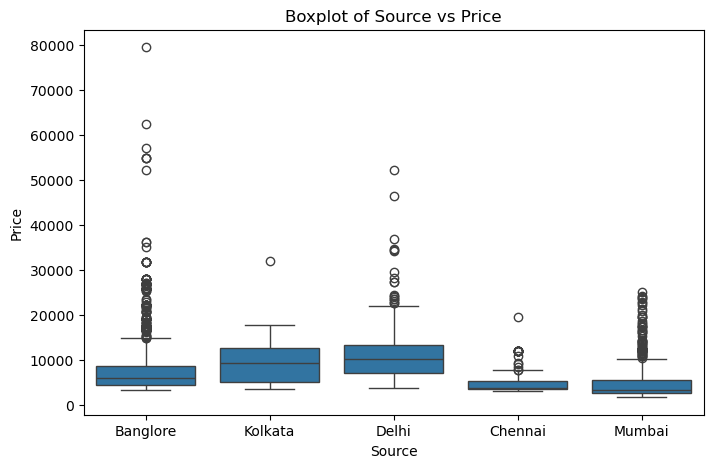

In [142]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Boxplot of Source vs Price')
plt.show()


## Destination vs Price

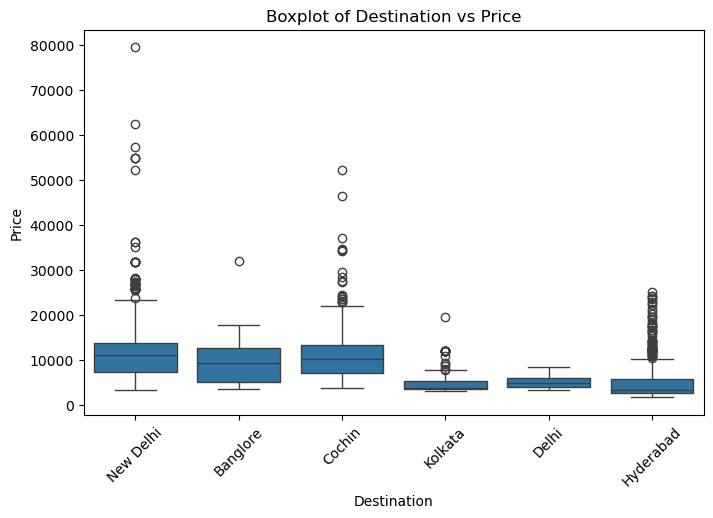

In [144]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Destination', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Destination vs Price')
plt.show()

## Total_Stops vs Price

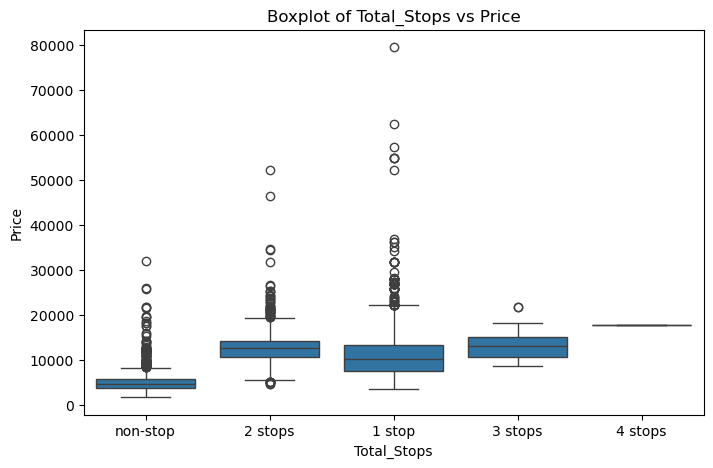

In [146]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Boxplot of Total_Stops vs Price')
plt.show()


Non-stop flights are cheaper, while 1 and 2 stops have higher and more varied prices. 
some outliers present in this feature.

## Additional_Info vs Price

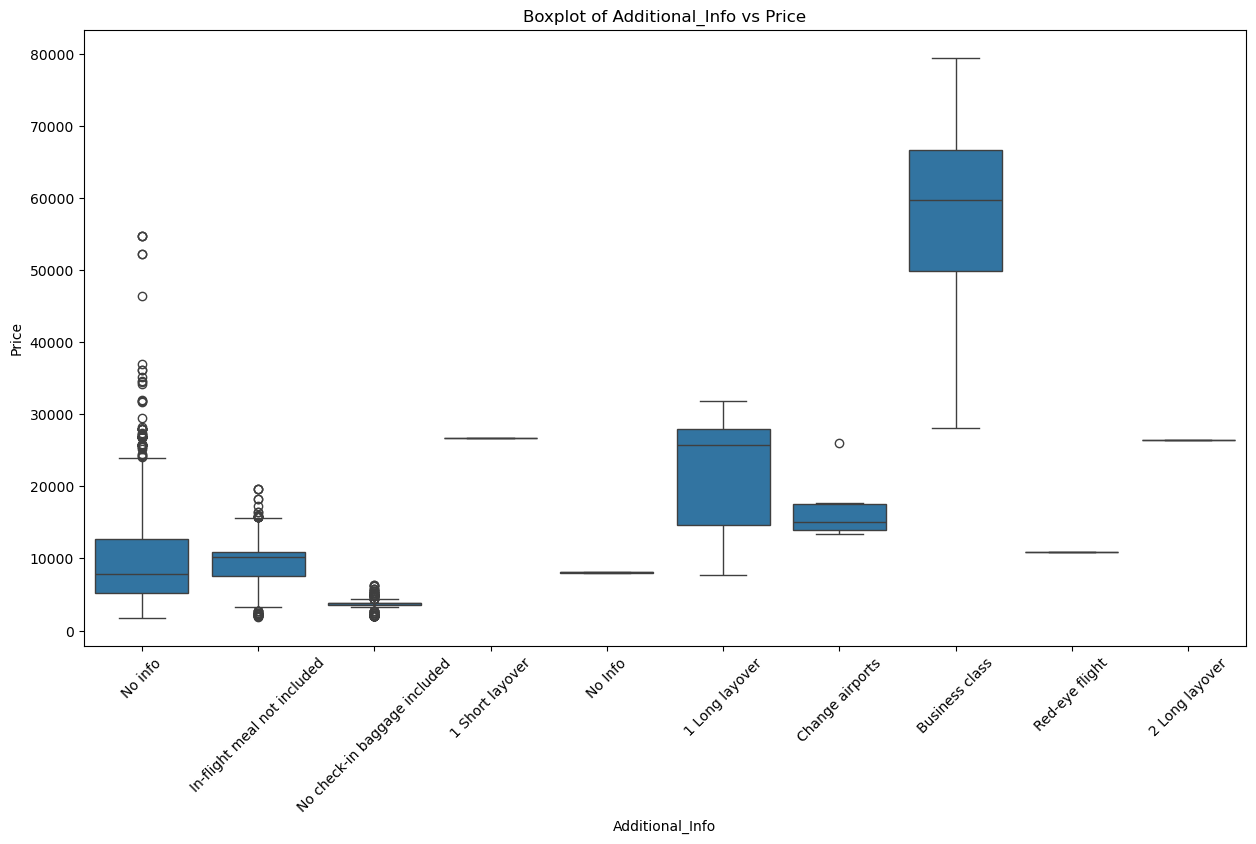

In [149]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Additional_Info', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Additional_Info vs Price')
plt.show()

The boxplot shows that flights with "Business class" have the highest prices
the columns like "No info","In-flight meal not included","No check-in baggage included" are relatively lower price

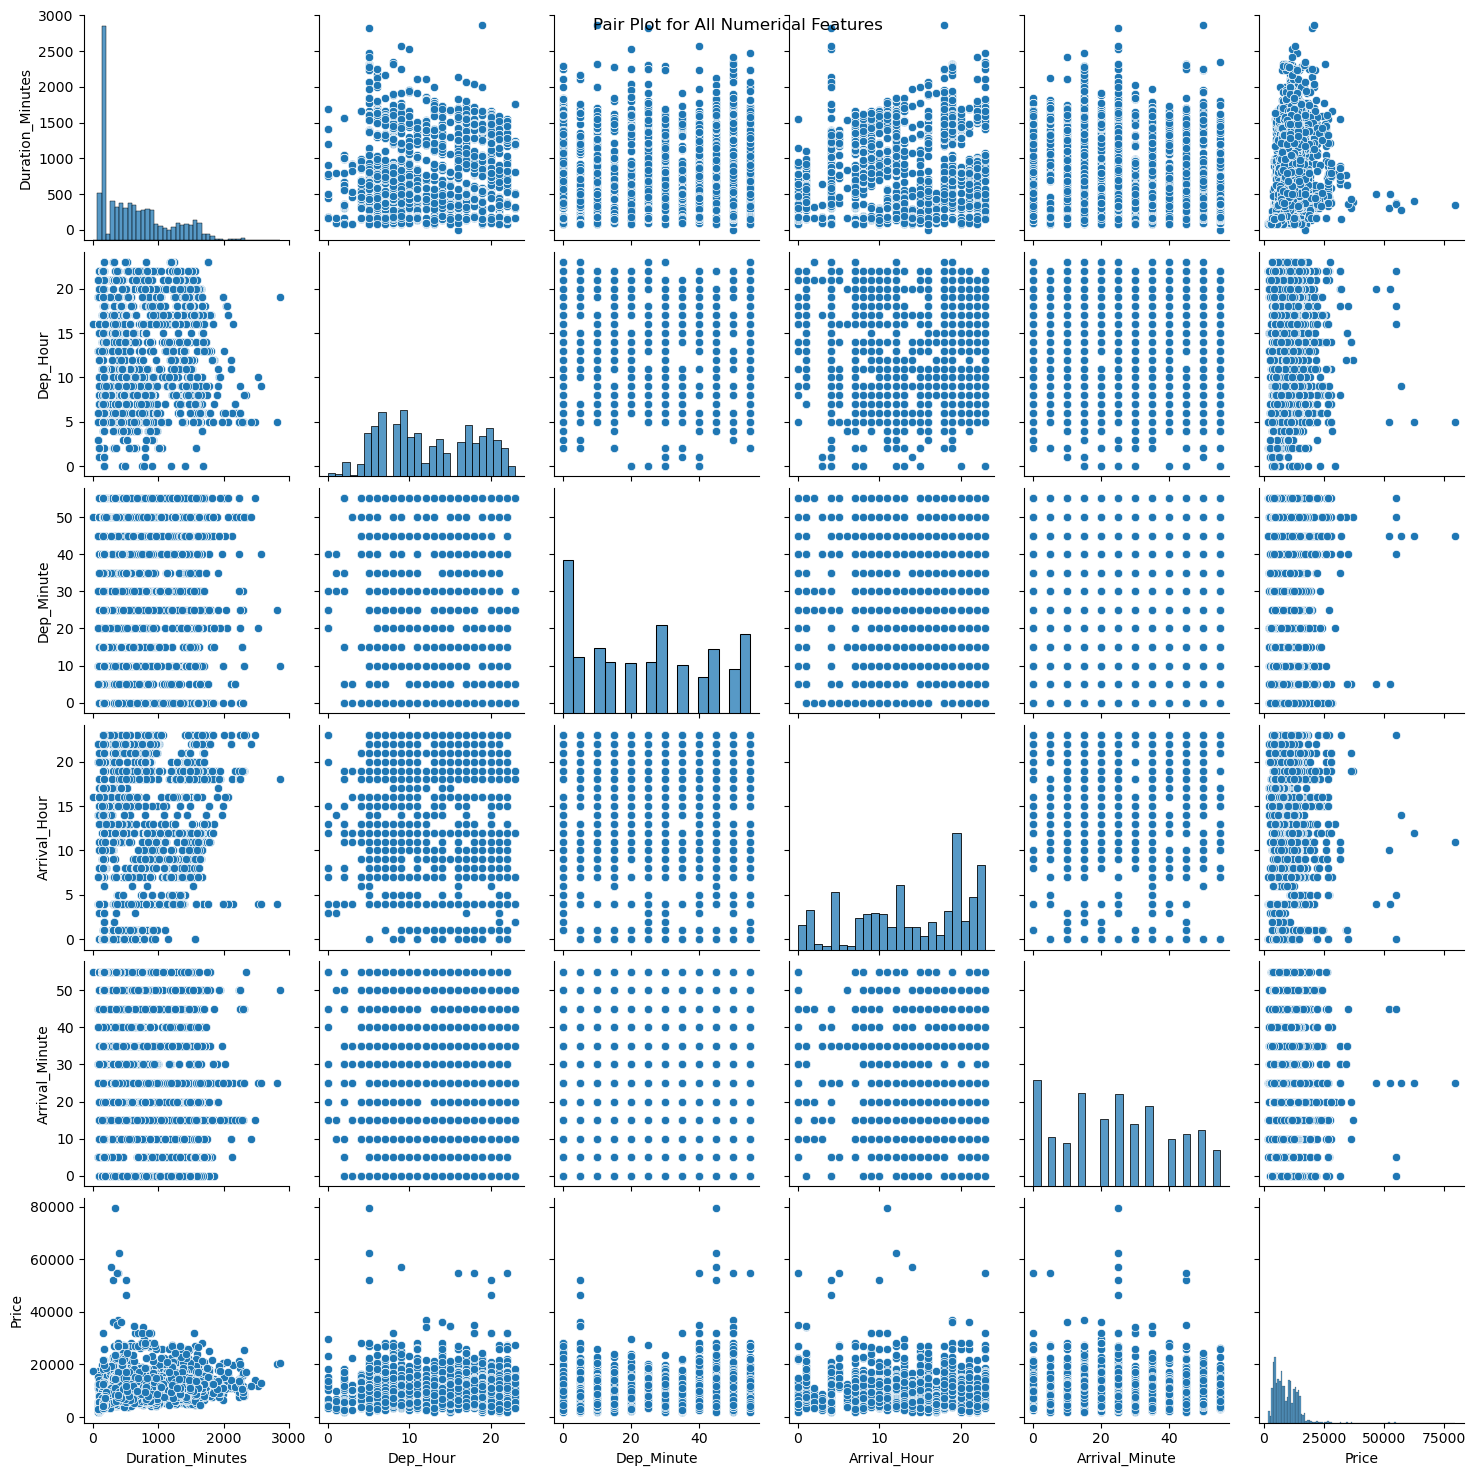

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['Duration_Minutes', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Price']  # Include all numerical columns

# Generate pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot for All Numerical Features')
plt.show()


## Data Preprocessing

### Finding Missing Values

In [154]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Minutes    0
dtype: int64

The data is clean and ready for encoding

In [156]:
df.select_dtypes(include='object')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [157]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,160


In [158]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int32
Journey_Month        int32
Dep_Hour             int32
Dep_Minute           int32
Arrival_Hour         int32
Arrival_Minute       int32
Duration_Minutes     int64
dtype: object

## Converting Categorical Data to Numerical By Encoding

### Label encoding for 'Airline', 'Source', and 'Destination'

In [161]:
label_encoder = LabelEncoder()
df['Airline'] = label_encoder.fit_transform(df['Airline'])
df['Source'] = label_encoder.fit_transform(df['Source'])
df['Destination'] = label_encoder.fit_transform(df['Destination'])
df['Additional_Info'] = label_encoder.fit_transform(df['Additional_Info'])

- Encoding Airline : We Use label encoding for each unique airline.
- Encoding Source and Destination  : we use label encoding for each unique city.                 
-  Encoding Additional_Info  : we use label encoding for each unique

### Encoding Route use frequency encoding

In [164]:
# Frequency Encoding for Route
route_frequency = df['Route'].value_counts().to_dict()
df['Route'] = df['Route'].map(route_frequency)

- Encoding Route : Use frequency encoding, as some routes may appear multiple times.

In [166]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5626
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [167]:
# Mapping Total_Stops
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2,'3 stops' :3,'4 stops': 4})

- We converted the Total_Stops column to numerical values using mapping

In [169]:
df.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int64
Total_Stops         int64
Additional_Info     int32
Price               int64
Journey_Day         int32
Journey_Month       int32
Dep_Hour            int32
Dep_Minute          int32
Arrival_Hour        int32
Arrival_Minute      int32
Duration_Minutes    int64
dtype: object

In [170]:
df.Airline.value_counts()

Airline
4     3700
3     2043
1     1695
6     1196
8      815
10     478
0      319
2      194
7       13
5        6
11       3
9        1
Name: count, dtype: int64

In [171]:
df.Source.value_counts()

Source
2    4346
3    2860
0    2179
4     697
1     381
Name: count, dtype: int64

In [172]:
df.Destination.value_counts()

Destination
1    4346
0    2860
2    1265
5     914
3     697
4     381
Name: count, dtype: int64

In [173]:
df.Total_Stops.value_counts()

Total_Stops
1    5626
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [174]:
df.Route.unique()

array([1536,    6,   41,    9,    3,  724,  402, 2377,  232,  381,  979,
        144,   42,   44,   15,   90,   17,   38,   65,  326,   53,  213,
        565,    4,   33,  146,  621,   48,  183,   40,   37,   29,   27,
         13,   50,   16,   46,   12,   20,   18,   83,   30,   11,   45,
         21,   19,    5,   25,    1,    2,   10,    7,    8], dtype=int64)

In [175]:
df.Total_Stops.value_counts()

Total_Stops
1    5626
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [176]:
df.Additional_Info.value_counts()

Additional_Info
8    8183
5    1926
7     318
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: count, dtype: int64

In [177]:
df.Additional_Info.unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [178]:
df.shape

(10463, 14)

In [179]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,3,0,5,1536,0,8,3897,24,3,22,20,1,10,170
1,1,3,0,6,2,8,7662,1,5,5,50,13,15,445
2,4,2,1,41,2,8,13882,9,6,9,25,4,25,1140


### Checking for outliers

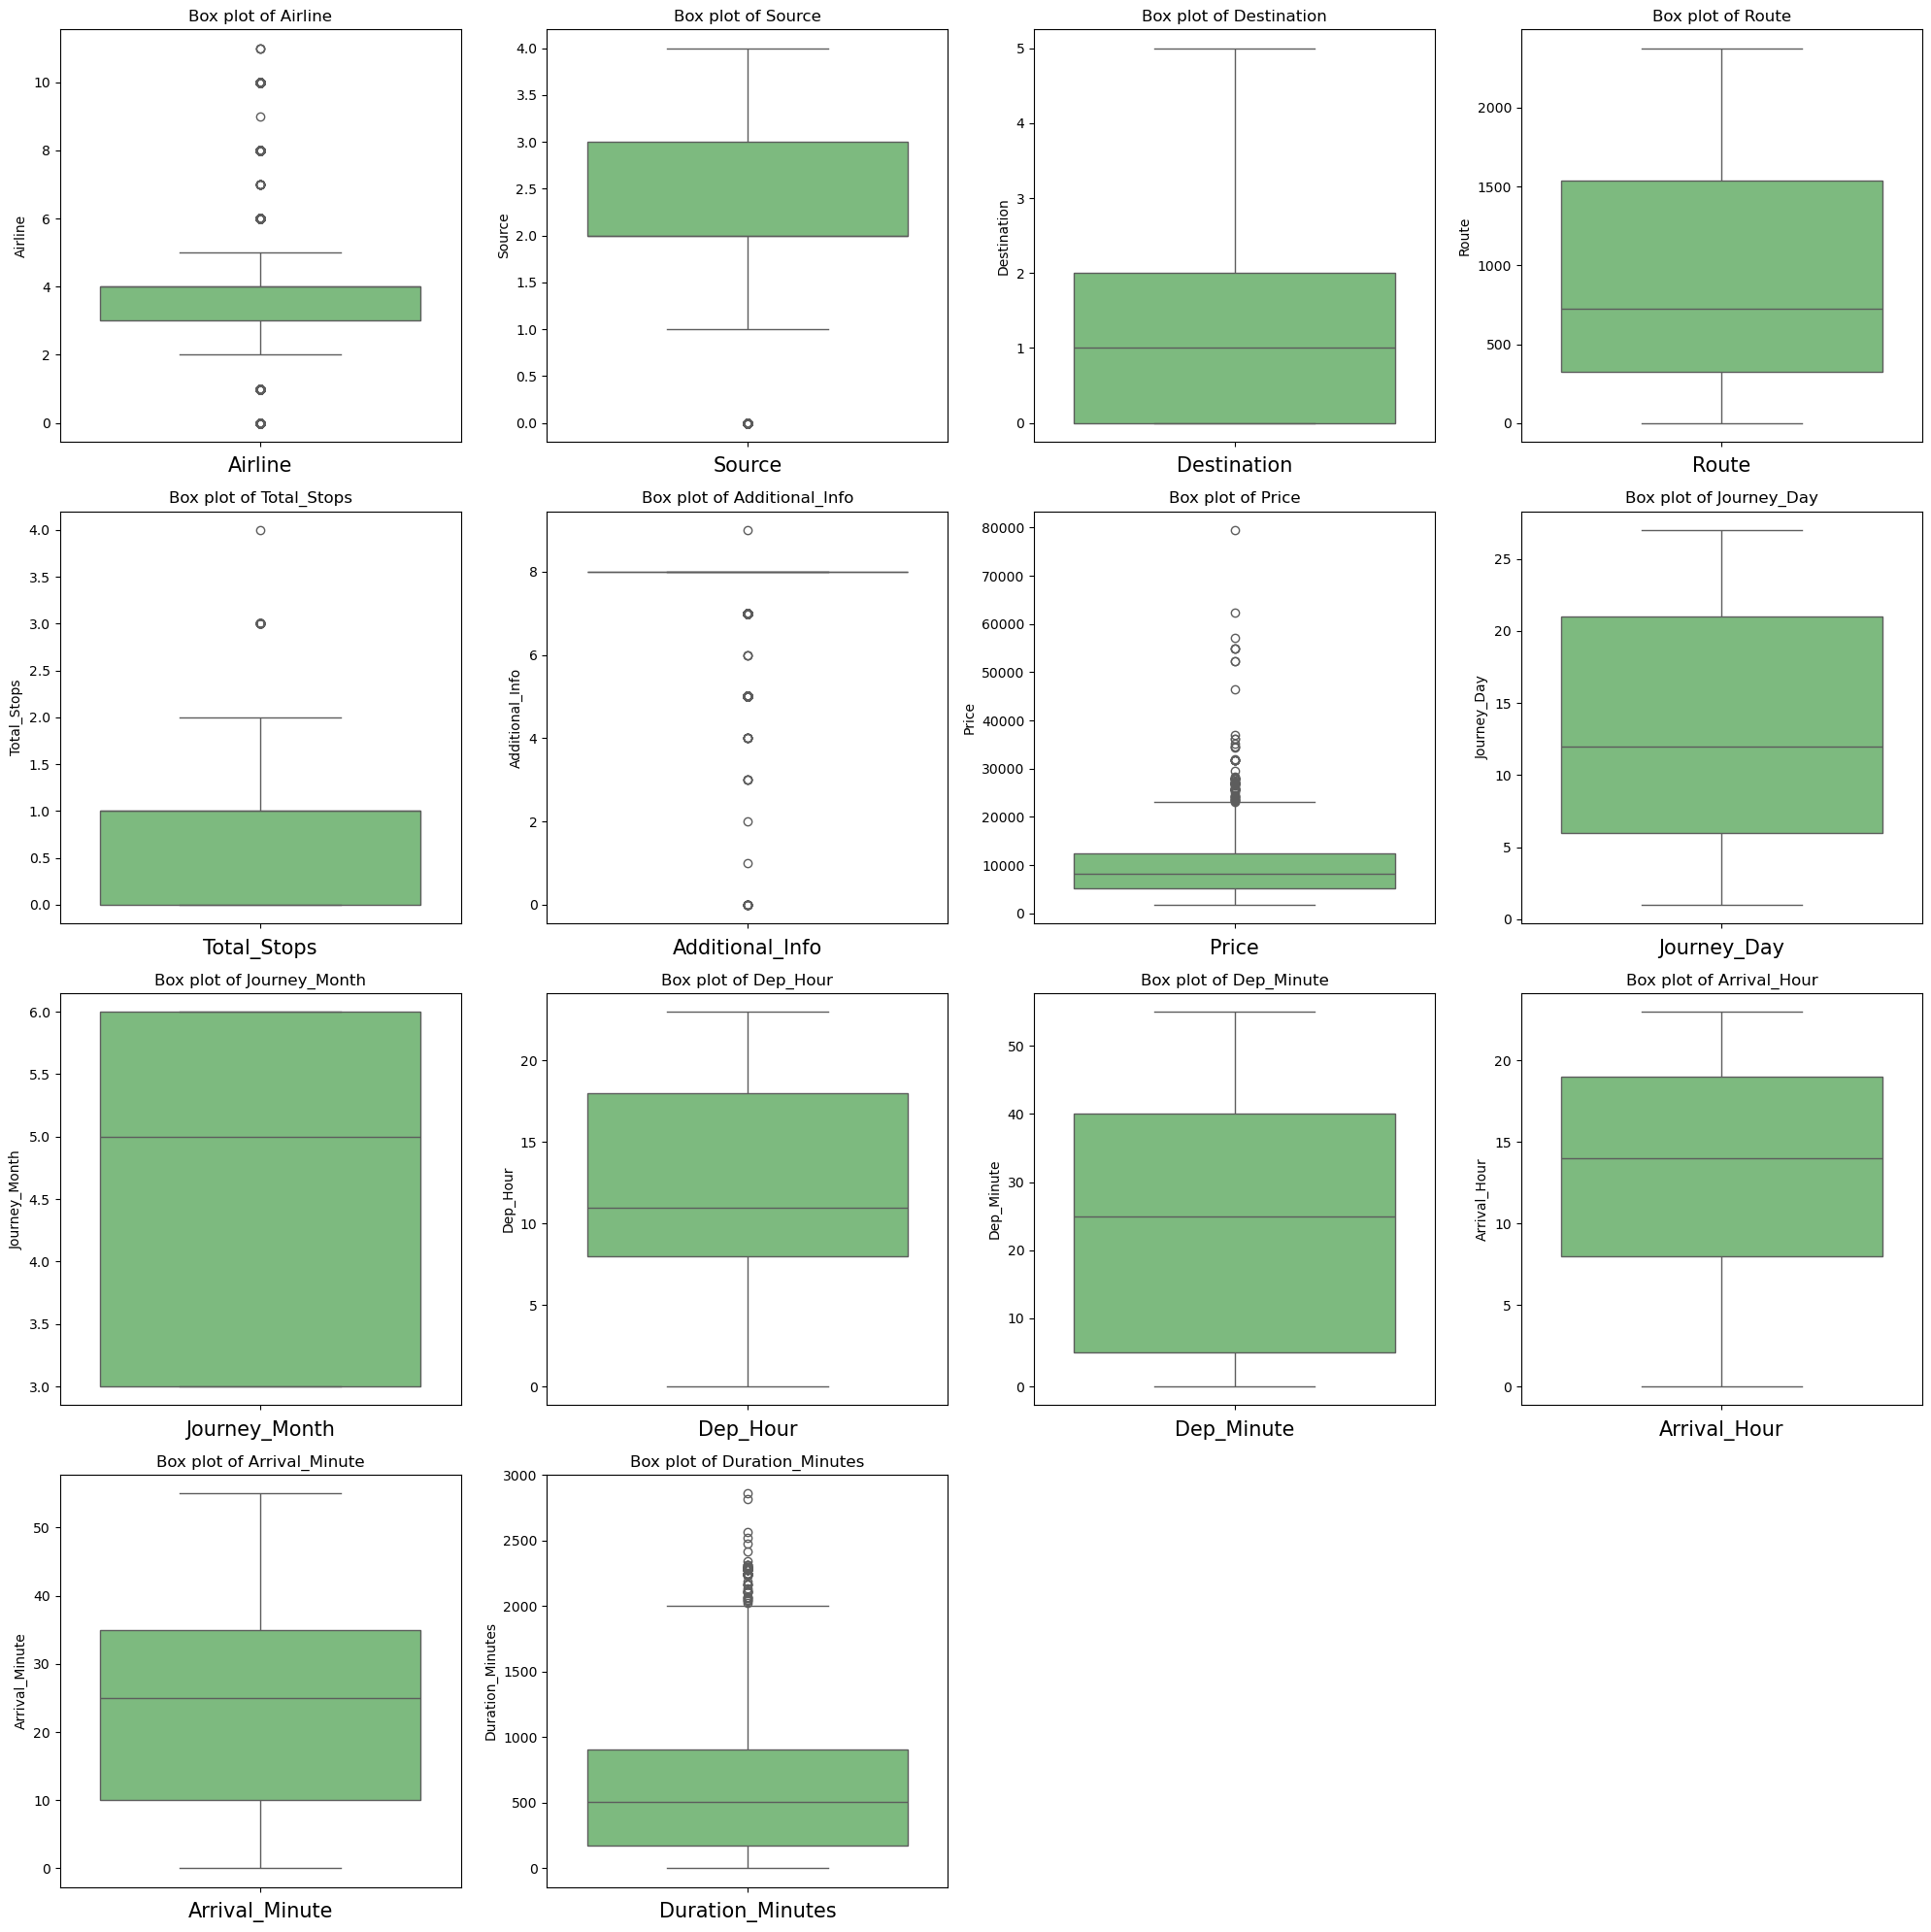

In [181]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<23:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i],palette="Greens")
        plt.xlabel(i,fontsize=15)
        plt.title(f'Box plot of {i}')
    plotnumber+=1
plt.tight_layout()
plt.show()

## Insights : 

### Price (Target Variable)

- Above boxplot we found a few high outliers flight prices ,which could distort the model.we need to handle with Log Transformation becuse Log transformation reduces the impact of extreme outliers  by compressing the range of data.
it helps to normalize the distribution of highly skewed data.

### Duration Minutes
- some flights have extremely high durations which we will handle the outliers by using IQR Method

## Total Stops 
- some flights have too many stops which could be distort the model we need to handle the outliers

### Source feature

- some rare outlier present in this feature i think not need to handle outlier for this column might be this will imp for our price prediction 

### Other features

- Airline : This column gives info about Airline Names so not needed to handling outliers 
-  Additional_Info : this column give the details of flight and does not impact in pricing so not need to  handle outliers we will remove this column.
- Other features are not present outliers so do not need to handle.

## Plotting distplot for Price

Text(0.5, 1.0, 'distribution of Prices')

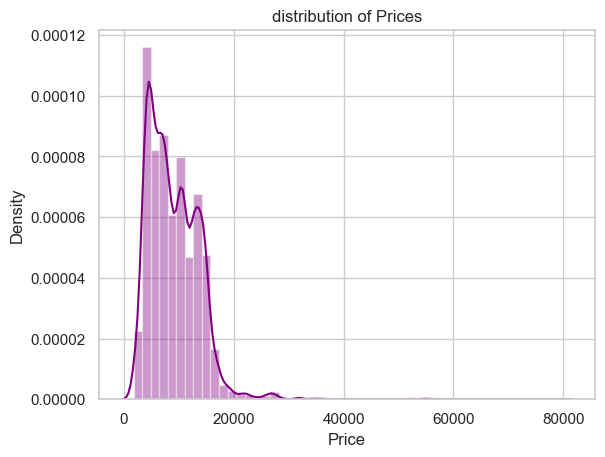

In [192]:
sns.set(style = 'whitegrid')
ax = sns.distplot(df['Price'],kde = True , color = 'Purple')
plt.title('distribution of Prices')

- Positive Skew: A skewness is a positive and indicates that the distribution is right-skewed (long tail on the right). This suggests that the majority of the flight prices are relatively lower, but there are a few high-price flights that are pulling the mean to the right.


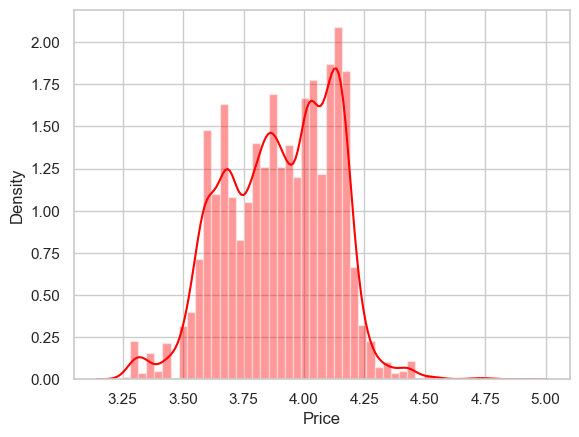

In [194]:
ax = sns.distplot(np.log10(df['Price']),kde = True,color = 'red')

## Plotting distplot for Duration_Minutes

Text(0.5, 1.0, 'distribution of Duration_Minutes')

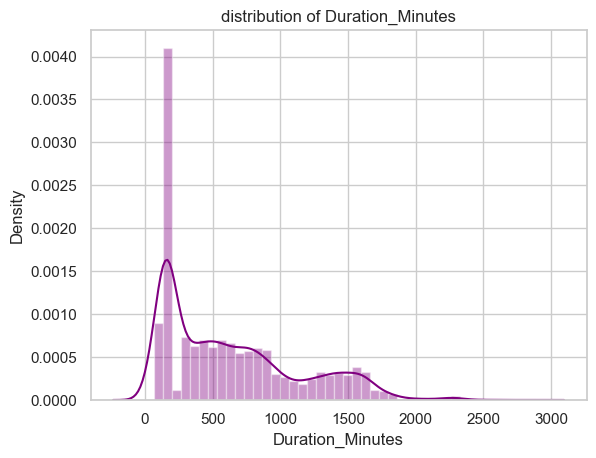

In [196]:
sns.set(style = 'whitegrid')
ax = sns.distplot(df['Duration_Minutes'],kde = True , color = 'Purple')
plt.title('distribution of Duration_Minutes')

<Axes: xlabel='Duration_Minutes'>

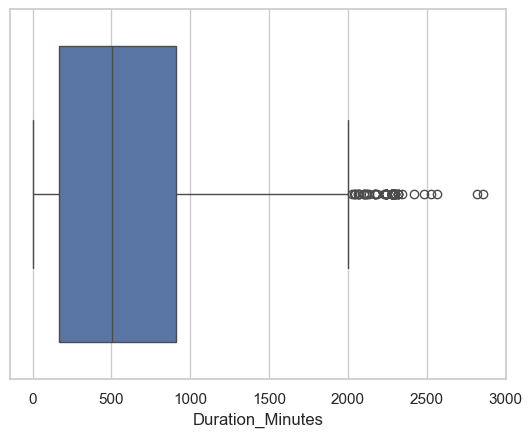

In [197]:
sns.boxplot(x='Duration_Minutes',data=df)

### Handling Outliers using IQR Method 

In [199]:
df['Duration_Minutes'].describe()

count    10463.000000
mean       629.856638
std        500.735311
min          0.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration_Minutes, dtype: float64

In [200]:
Q1=df['Duration_Minutes'].quantile(0.25)
print("Low quantile:",Q1)
Q3=df['Duration_Minutes'].quantile(0.75)
print("Upper quantile:",Q3)
# find IQR
IQR=Q3-Q1
print("IQR:",IQR)

Low quantile: 170.0
Upper quantile: 910.0
IQR: 740.0


In [201]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("Lower Limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper Limit:",upper_limit)

Lower Limit: -940.0
Upper Limit: 2020.0


In [202]:
#Lower Limit = Q1 - 1.5 * IQR = 170 - 1.5 * 740 = -940
#Upper Limit = Q3 + 1.5 * IQR = 910 + 1.5 * 740 = 2020
#Values lesser than lower limit or values higher than higher 
#limit are called as outliers

In [203]:
 df.loc[df['Duration_Minutes']<lower_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes


In [204]:
df.loc[df['Duration_Minutes']>upper_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
226,4,2,1,90,2,8,18799,3,3,5,25,18,50,2245
470,4,2,1,18,2,8,13082,21,3,18,20,4,25,2045
553,1,2,1,144,2,8,10598,9,3,5,0,19,15,2295
919,1,3,0,2,3,8,10991,12,5,12,0,23,15,2115
925,4,2,1,2,2,8,19907,6,3,16,50,4,25,2135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,1,2,1,48,2,8,13748,3,3,5,55,19,15,2240
10020,1,2,1,144,2,8,9653,9,5,5,0,19,15,2295
10326,1,0,5,11,2,8,11791,3,3,5,50,22,10,2420
10456,4,2,1,144,2,8,20694,6,3,19,10,18,50,2860


In [205]:
#Replace outliers with median because data is not normally distributed
df.loc[df['Duration_Minutes']>upper_limit,'Duration_Minutes']=df["Duration_Minutes"].median()

<Axes: xlabel='Duration_Minutes'>

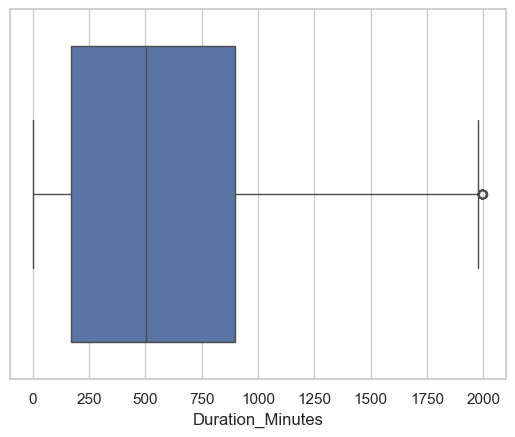

In [206]:
sns.boxplot(x='Duration_Minutes',data=df)

<Axes: xlabel='Duration_Minutes', ylabel='Count'>

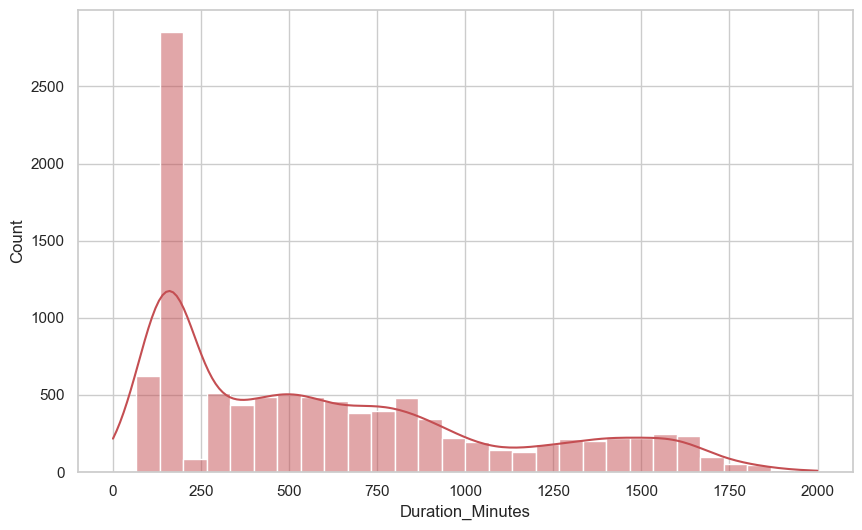

In [207]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], kde=True, color='r', bins=30)

In [208]:
skewness_price = df['Price'].skew()
skewness_Duration_Minutes= df['Duration_Minutes'].skew()

print(f"Skewness of price: {skewness_price}")
print(f"Skewness of Duration_Minutes: {skewness_Duration_Minutes}")

Skewness of price: 1.8576412037679872
Skewness of Duration_Minutes: 0.8124395416841009


<Axes: xlabel='Duration_Minutes', ylabel='Count'>

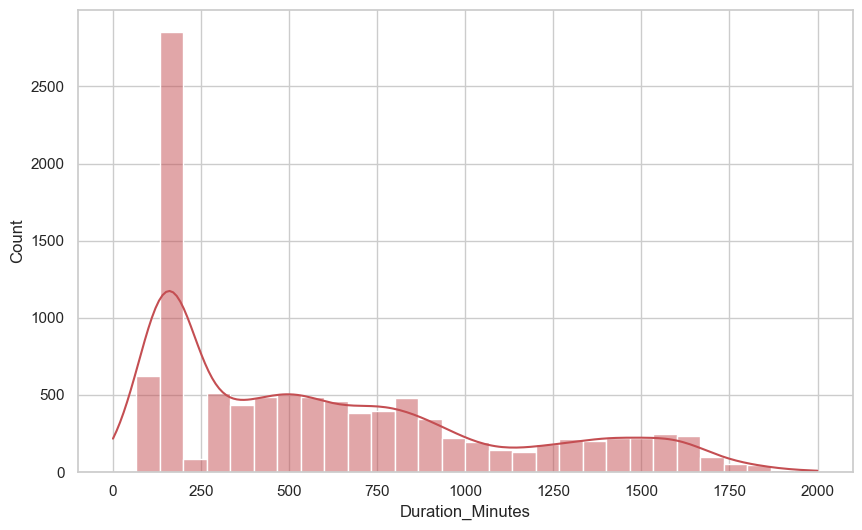

In [209]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], kde=True, color='r', bins=30)

In [210]:
import numpy as np

# Apply log transformation to handle positive skewness
df['Duration_Minutes'] = np.log1p(df['Duration_Minutes'])

# Check skewness after transformation
skewness_after = df['Duration_Minutes'].skew()
print(f"Skewness of Duration_Minutes after log transformation: {skewness_after}")


Skewness of Duration_Minutes after log transformation: -0.18065310697074372


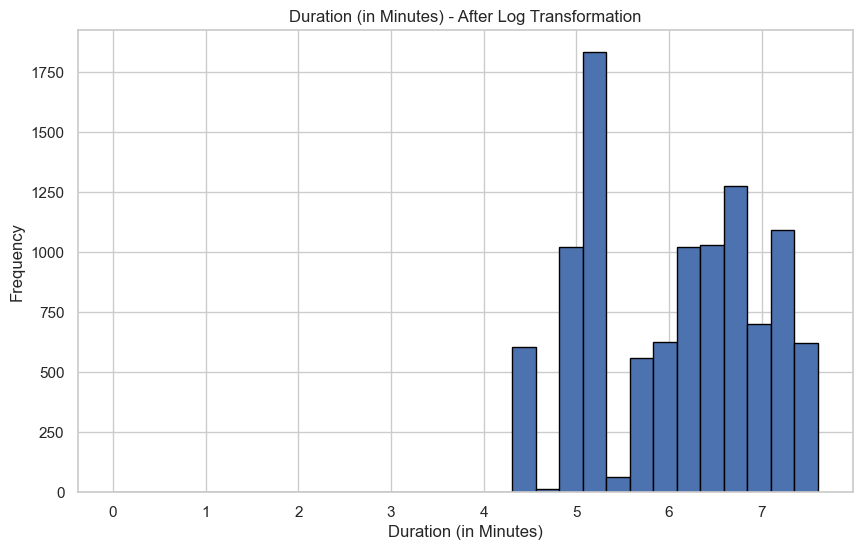

In [211]:
import matplotlib.pyplot as plt

# Plot histogram after log transformation
plt.figure(figsize=(10, 6))
plt.hist(df['Duration_Minutes'], bins=30, edgecolor='black')
plt.title("Duration (in Minutes) - After Log Transformation")
plt.xlabel("Duration (in Minutes)")
plt.ylabel("Frequency")
plt.show()


<Axes: xlabel='Total_Stops'>

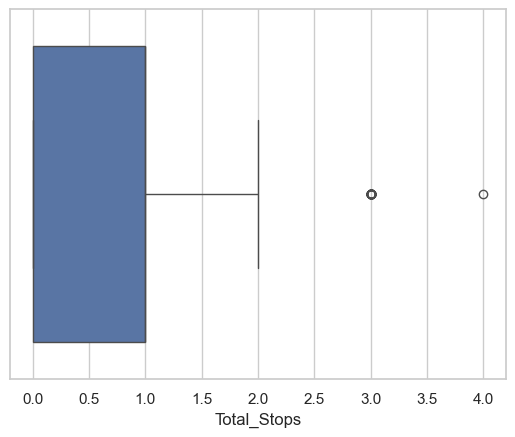

In [212]:
sns.boxplot(x='Total_Stops',data=df)

In [213]:
df['Total_Stops'].describe()

count    10463.000000
mean         0.802351
std          0.660580
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Total_Stops, dtype: float64

In [214]:
Q1=df['Total_Stops'].quantile(0.25)
print("Low quantile:",Q1)
Q3=df['Total_Stops'].quantile(0.75)
print("Upper quantile:",Q3)
# find IQR
IQR=Q3-Q1
print("IQR:",IQR)

Low quantile: 0.0
Upper quantile: 1.0
IQR: 1.0


In [215]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("Lower Limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper Limit:",upper_limit)

Lower Limit: -1.5
Upper Limit: 2.5


In [216]:
 df.loc[df['Total_Stops']<lower_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes


In [217]:
df.loc[df['Total_Stops']>upper_limit]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
402,1,2,1,15,3,8,10493,15,6,5,15,7,40,7.368970
919,1,3,0,2,3,8,10991,12,5,12,0,23,15,6.226537
1218,1,2,1,15,3,8,11543,27,6,5,15,7,40,7.368970
1665,1,0,5,2,3,8,12346,1,3,5,50,12,15,7.509883
2172,1,2,1,15,3,8,10703,18,5,5,15,19,15,6.226537
2623,1,4,3,1,3,8,18293,12,3,9,40,15,15,7.482119
2633,6,2,1,8,3,8,21829,6,3,11,35,21,0,6.338594
2718,1,2,1,15,3,8,15586,9,3,5,15,19,15,6.226537
2814,1,0,5,2,3,8,13387,12,3,17,25,18,5,7.300473
2822,1,3,0,4,3,8,13007,24,5,10,0,10,30,7.293698


<Axes: xlabel='Total_Stops', ylabel='Count'>

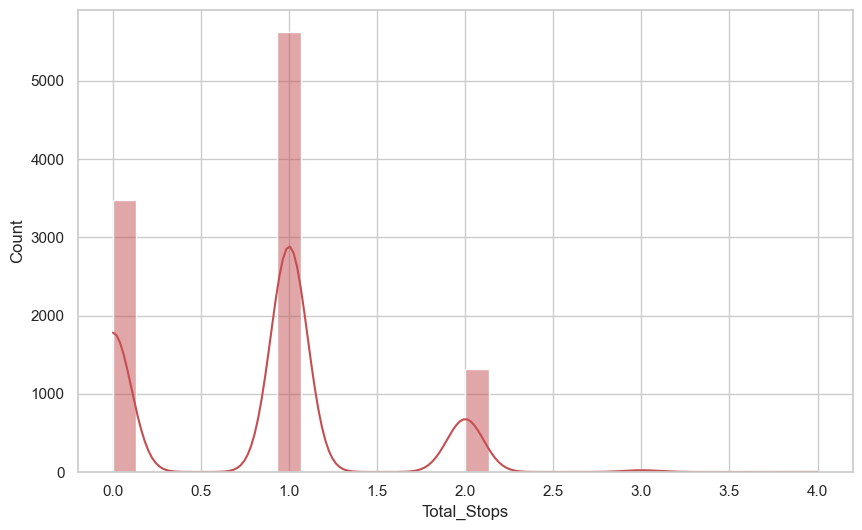

In [218]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Stops'], kde=True, color='r', bins=30)

In [219]:
#Replace outliers with median because data is not normally distributed
df.loc[df['Total_Stops']>upper_limit,'Total_Stops']=df["Total_Stops"].median()

<Axes: xlabel='Total_Stops'>

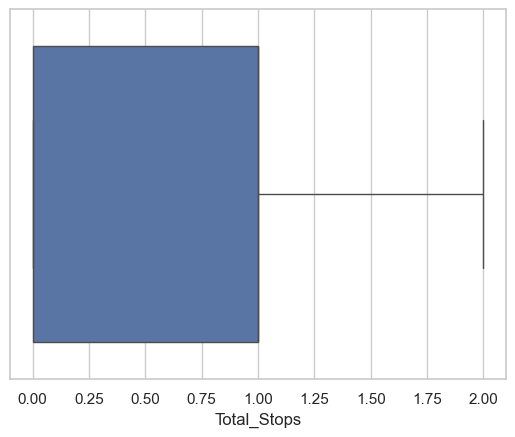

In [220]:
sns.boxplot(x='Total_Stops',data=df)

<Axes: xlabel='Total_Stops', ylabel='Count'>

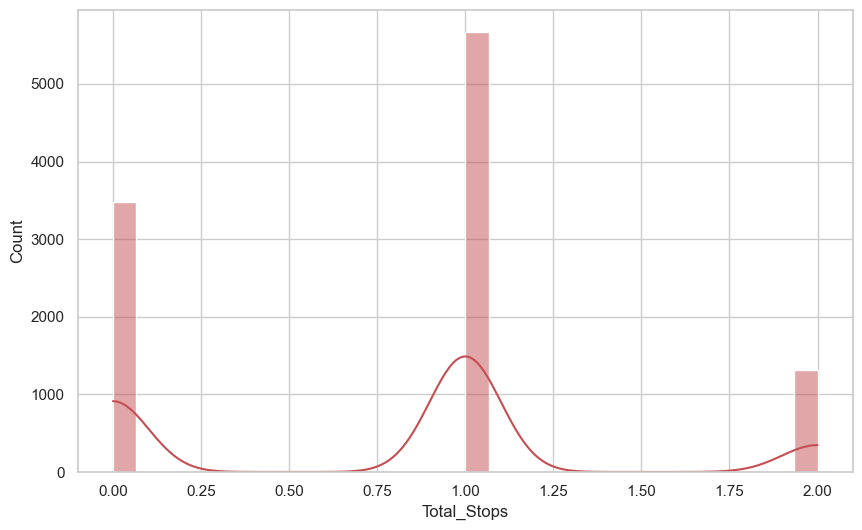

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Stops'], kde=True, color='r', bins=30)

<Axes: xlabel='Source'>

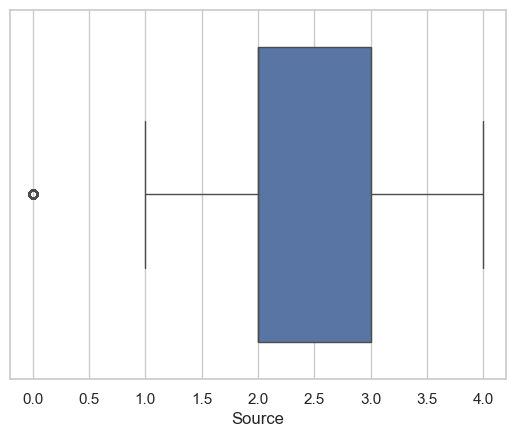

In [222]:
sns.boxplot(x='Source',data=df)

### Boxplot of Source vs Price

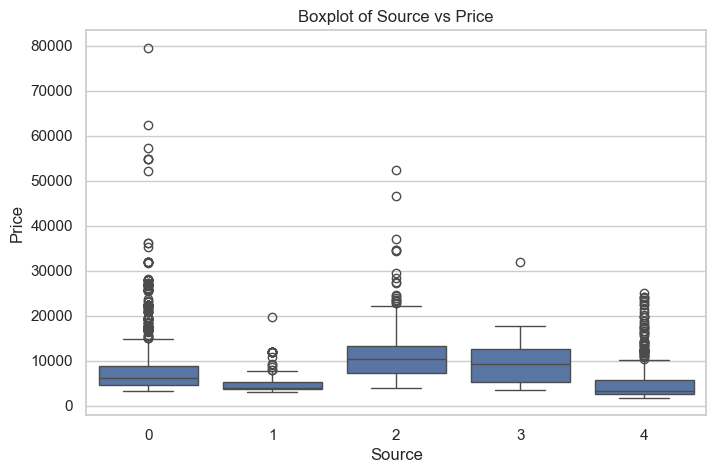

In [224]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Boxplot of Source vs Price')
plt.show()

- we can see here boxplot of source vr price ,we can say these outliers might be due to premium flights,last minute bookings or season wise prices 
so no need to remove outliers because these values are imp for flight prices

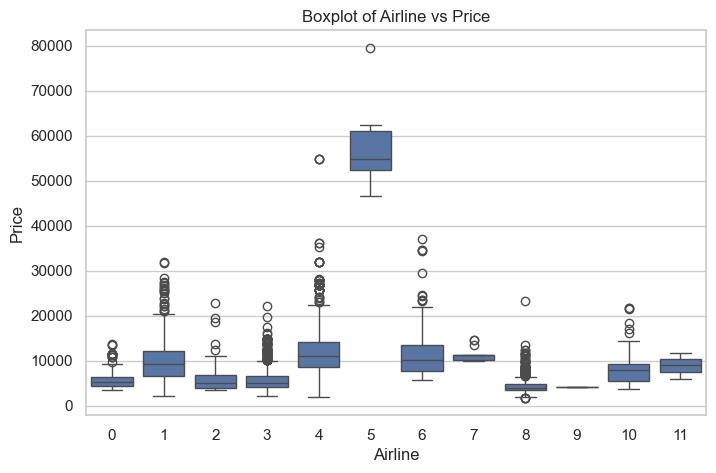

In [226]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Boxplot of Airline vs Price')
plt.show()

- Many airlines have high priced outliers meaning some flights are extremely expensive
- No need for outlier removal because these prices might be valid for premium flights.

In [228]:
df.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
Airline,1.000000,-0.012175,0.015976,0.193814,-0.187747,-0.058275,-0.036447,0.026585,0.026050,-0.032191,-0.062545,-0.005361,-0.073041,-0.115364
Source,-0.012175,1.000000,-0.589991,-0.196254,0.198973,-0.021585,0.013795,0.005437,0.181073,0.060215,-0.056602,0.028254,0.021392,0.121057
Destination,0.015976,-0.589991,1.000000,-0.083241,-0.300450,0.024907,-0.065865,-0.040967,-0.362191,-0.074037,0.128484,-0.044586,0.016351,-0.335871
Route,0.193814,-0.196254,-0.083241,1.000000,-0.194656,-0.112723,0.038952,0.052724,0.094499,-0.007043,-0.163505,-0.032692,-0.112247,0.008677
Total_Stops,-0.187747,0.198973,-0.300450,-0.194656,1.000000,-0.086324,0.604325,-0.016361,0.041683,-0.059791,-0.002791,0.048150,-0.106157,0.816515
Additional_Info,-0.058275,-0.021585,0.024907,-0.112723,-0.086324,1.000000,-0.068794,-0.016484,-0.049173,-0.059433,-0.015862,0.021262,0.044321,-0.184099
Price,-0.036447,0.013795,-0.065865,0.038952,0.604325,-0.068794,1.000000,-0.159009,-0.113403,0.005174,-0.024189,0.031043,-0.086164,0.598690
Journey_Day,0.026585,0.005437,-0.040967,0.052724,-0.016361,-0.016484,-0.159009,1.000000,-0.038351,-0.003343,-0.004833,-0.002394,-0.015087,-0.030338
Journey_Month,0.026050,0.181073,-0.362191,0.094499,0.041683,-0.049173,-0.113403,-0.038351,1.000000,0.040390,-0.062605,0.001407,-0.099260,0.033633
Dep_Hour,-0.032191,0.060215,-0.074037,-0.007043,-0.059791,-0.059433,0.005174,-0.003343,0.040390,1.000000,-0.015131,-0.003789,0.072987,-0.006590


## Feature Engineering/feature selection

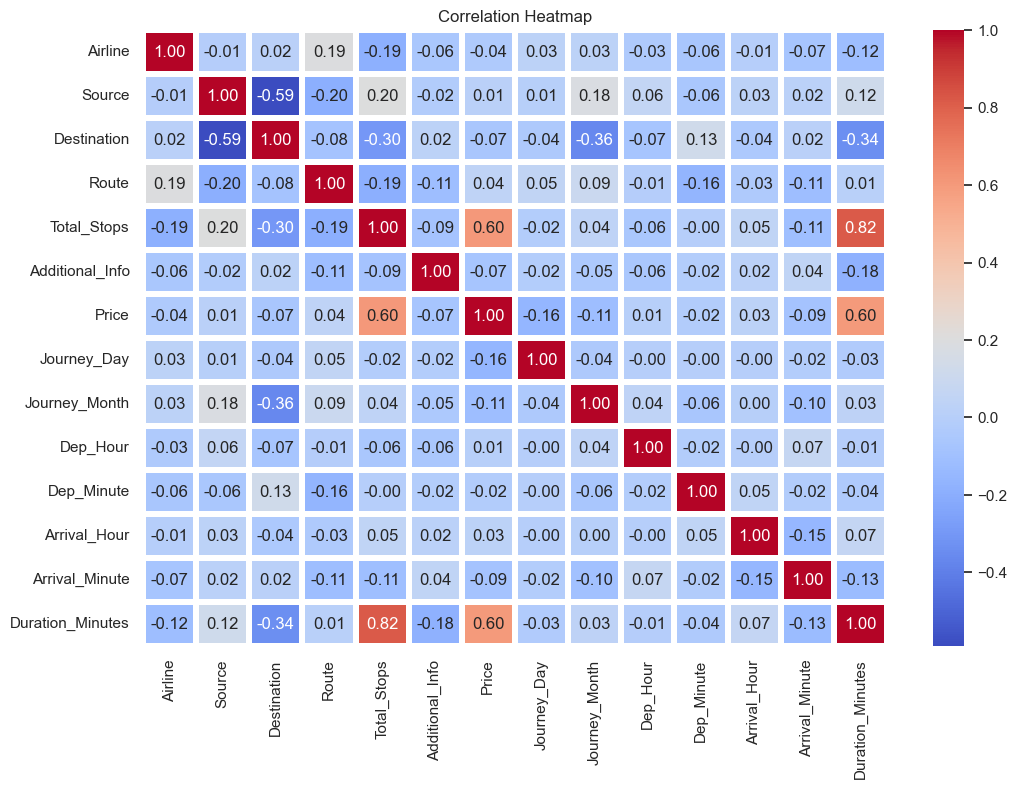

In [230]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm', fmt='.2f', linewidths=2.9)
plt.title('Correlation Heatmap')
plt.show() 

- We remove Route column because Total_stops already gives more impactful information which important for price prediction.
also we remove Additional_Info column because most of its values are the same, and it doesn’t help in predicting the price.
Route and Additional_Info are mostly useless data, so I dropped them.

In [232]:
df = df.drop(['Route', 'Additional_Info'], axis=1)  

In [233]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,3,0,5,0,3897,24,3,22,20,1,10,5.141664
1,1,3,0,2,7662,1,5,5,50,13,15,6.100319
2,4,2,1,2,13882,9,6,9,25,4,25,7.039660


In [234]:
df.shape

(10463, 12)

### Splitting data into training and testing

In [236]:
# Separate features and target
x = df.drop(columns=['Price'])
y = df['Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [237]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (8370, 11)
Testing set shape: (2093, 11)


In [238]:
x_train

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
6615,0,2,1,1,9,3,20,10,7,10,6.493754
6729,4,3,0,1,18,5,17,0,23,35,5.981414
3475,4,3,0,1,18,5,8,25,22,35,6.746412
8977,3,2,1,1,15,5,6,40,21,0,6.758095
3494,4,0,2,0,6,5,8,20,11,20,5.198497
...,...,...,...,...,...,...,...,...,...,...,...
5799,3,0,2,0,3,6,8,30,11,20,5.141664
5247,4,0,5,1,21,3,7,0,21,20,6.758095
5452,3,2,1,1,3,4,10,35,15,35,5.707110
861,3,2,1,0,27,4,5,35,8,50,5.278115


In [239]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (8370,)
Testing set shape: (2093,)


In [240]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (8370,)
Testing set shape: (2093,)


## Feature Scaling:

In [242]:
from sklearn.preprocessing import StandardScaler

# Define the StandardScaler object
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [243]:
x_train_scaled

array([[-1.6801477 ,  0.03580827, -0.29916394, ..., -0.92657577,
        -0.88571566,  0.46852414],
       [ 0.00377222,  0.8777049 , -0.97174041, ...,  1.40882835,
         0.62562742, -0.10443742],
       [ 0.00377222,  0.8777049 , -0.97174041, ...,  1.26286559,
         0.62562742,  0.75107789],
       ...,
       [-0.41720776,  0.03580827, -0.29916394, ...,  0.24112629,
         0.62562742, -0.41119802],
       [-0.41720776,  0.03580827, -0.29916394, ..., -0.78061301,
         1.53243327, -0.89095398],
       [ 1.68769214, -0.80608837,  1.71856546, ..., -0.19676198,
        -1.4902529 , -1.29965631]])

In [244]:
x_test_scaled

array([[-1.25916772,  0.8777049 , -0.97174041, ...,  1.40882835,
        -0.58344705,  0.21304015],
       [-1.25916772,  0.8777049 , -0.97174041, ...,  0.67901456,
        -0.28117843,  0.23410148],
       [-0.41720776, -1.647985  ,  0.37341253, ..., -1.07253852,
         1.53243327, -1.04355048],
       ...,
       [ 2.52965211, -1.647985  ,  0.37341253, ..., -0.19676198,
         0.62562742, -1.04355048],
       [ 0.84573218,  0.03580827, -0.29916394, ...,  0.82497732,
        -1.4902529 ,  0.82727014],
       [-0.41720776,  0.03580827, -0.29916394, ...,  1.11690283,
        -1.4902529 ,  0.5421785 ]])

In [245]:
y_train

6615     8327
6729    14151
3475    10844
8977     7191
3494     4544
        ...  
5799     4823
5247     7832
5452     5073
861      6015
7367     3543
Name: Price, Length: 8370, dtype: int64

In [246]:
y_test

7659     15894
8235      8366
3585      3943
7625      8085
4812      4049
         ...  
4509      3540
653      12898
10365     5613
6094     10197
9714      6838
Name: Price, Length: 2093, dtype: int64

# Model Creation 

In [248]:
# Train Linear Regression Model
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [249]:
# Predictions
train_pred_lr = regressor.predict(x_train_scaled)
test_pred_lr = regressor.predict(x_test_scaled)

# Metrics
r2_train_lr = r2_score(y_train, train_pred_lr)
r2_test_lr = r2_score(y_test, test_pred_lr)
mae_lr = mean_absolute_error(y_test, test_pred_lr)
mse_lr = mean_squared_error(y_test, test_pred_lr)
rmse_lr = math.sqrt(mse_lr)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R2 Train Score: {r2_train_lr}")
print(f"R2 Test Score: {r2_test_lr}")

Mean Absolute Error (MAE): 2376.109941529508
Mean Squared Error (MSE): 11149241.333279278
Root Mean Squared Error (RMSE): 3339.0479681009792
R2 Train Score: 0.45753644646093217
R2 Test Score: 0.4656407821201832


### Train Ridge Regression

In [251]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)

# Predict and evaluate Ridge
ridge_train_pred = ridge_model.predict(x_train_scaled)
ridge_test_pred = ridge_model.predict(x_test_scaled)

# Train and Test R² scores for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f"Ridge Regression Train R2 Score: {ridge_train_r2}")
print(f"Ridge Regression Test R2 Score: {ridge_test_r2}")

Ridge Regression Train R2 Score: 0.45753644224254475
Ridge Regression Test R2 Score: 0.46564301696702703


### Train Lasso Regression

In [253]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train_scaled, y_train)

# Predict and evaluate Lasso
lasso_train_pred = lasso_model.predict(x_train_scaled)
lasso_test_pred = lasso_model.predict(x_test_scaled)

# Train and Test R² scores for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

print(f"Lasso Regression Train R2 Score: {lasso_train_r2}")
print(f"Lasso Regression Test R2 Score: {lasso_test_r2}")

Lasso Regression Train R2 Score: 0.45753644641334124
Lasso Regression Test R2 Score: 0.46564059874525


## Compare Models

In [255]:
# Display comparison
print(f"Linear Regression R2 Score: {r2_test_lr}")
print(f"Ridge Regression R2 Score: {ridge_test_r2}")
print(f"Lasso Regression R2 Score: {lasso_test_r2}")

Linear Regression R2 Score: 0.4656407821201832
Ridge Regression R2 Score: 0.46564301696702703
Lasso Regression R2 Score: 0.46564059874525


## No significant improvement is gained by adding regularization (Ridge/Lasso).

### now we use some advanced algorithms that are well-suited for regression problems:

# Dicision Tree

In [259]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [260]:
# Predictions
train_pred_dt = dt.predict(x_train_scaled)
test_pred_dt = dt.predict(x_test_scaled)


# Metrics
r2_train_dt = r2_score(y_train, train_pred_dt)
r2_test_dt = r2_score(y_test, test_pred_dt)
mae_dt = mean_absolute_error(y_test, test_pred_dt)
mse_dt = mean_squared_error(y_test, test_pred_dt)
rmse_dt = math.sqrt(mse_dt)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R2 Train Score: {r2_train_dt}")
print(f"R2 Test Score: {r2_test_dt}")

Mean Absolute Error (MAE): 1814.3611568268445
Mean Squared Error (MSE): 6832649.799710179
Root Mean Squared Error (RMSE): 2613.933778753811
R2 Train Score: 0.6872097029058071
R2 Test Score: 0.6725257536473166


# Random Forest

In [262]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [263]:
# Predictions
train_pred_rf = rf.predict(x_train_scaled)
test_pred_rf = rf.predict(x_test_scaled)

# Metrics
r2_train_rf = r2_score(y_train, train_pred_rf)
r2_test_rf = r2_score(y_test, test_pred_rf)
mae_rf = mean_absolute_error(y_test, test_pred_rf)
mse_rf = mean_squared_error(y_test, test_pred_rf)
rmse_rf = math.sqrt(mse_rf)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R2 Train Score: {r2_train_rf}")
print(f"R2 Test Score: {r2_test_rf}")     

Mean Absolute Error (MAE): 1210.4079465679247
Mean Squared Error (MSE): 4125109.20131765
Root Mean Squared Error (RMSE): 2031.0364844870833
R2 Train Score: 0.952510169514561
R2 Test Score: 0.8022923658576331


training score is slightly higher than test score ,suggesting slightly overfitting .

# Gradient Boosting

In [266]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb = GradientBoostingRegressor(max_depth=4, random_state=42)
gb.fit(x_train_scaled, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [267]:
# Predictions
train_pred_gb = gb.predict(x_train_scaled)
test_pred_gb = gb.predict(x_test_scaled)

r2_train_gb = r2_score(y_train, train_pred_gb)
r2_test_gb = r2_score(y_test, test_pred_gb)
mae_gb = mean_absolute_error(y_test, test_pred_gb)
mse_gb = mean_squared_error(y_test, test_pred_gb)
rmse_gb = math.sqrt(mse_gb)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R2 Train Score: {r2_train_gb}")
print(f"R2 Test Score: {r2_test_gb}")                   

Mean Absolute Error (MAE): 1406.7248446311085
Mean Squared Error (MSE): 4331994.54506526
Root Mean Squared Error (RMSE): 2081.3444080846543
R2 Train Score: 0.835347762971959
R2 Test Score: 0.7923767951769818


#  XGBoost

In [269]:
# XGBoost
from xgboost import XGBRegressor

# Train XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [270]:
# Predictions
train_pred_xgb = xgb.predict(x_train_scaled)
test_pred_xgb = xgb.predict(x_test_scaled)

# Metrics
r2_train_xgb = r2_score(y_train, train_pred_xgb)
r2_test_xgb = r2_score(y_test, test_pred_xgb)
mae_xgb = mean_absolute_error(y_test, test_pred_xgb)
mse_xgb = mean_squared_error(y_test, test_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R2 Train Score: {r2_train_xgb}")
print(f"R2 Test Score: {r2_test_xgb}")                   

Mean Absolute Error (MAE): 1148.444126207522
Mean Squared Error (MSE): 3446874.2960891905
Root Mean Squared Error (RMSE): 1856.575960226026
R2 Train Score: 0.9392716728895156
R2 Test Score: 0.8347987098018513


### Support Vector Regressor (SVR)

In [272]:
# Support Vector Regressor
from sklearn.svm import SVR

# Train SVR Model
svr = SVR(kernel='rbf')
svr.fit(x_train_scaled, y_train)

SVR()

In [273]:
# Predictions 
train_pred_svr = svr.predict(x_train_scaled)
test_pred_svr = svr.predict(x_test_scaled)

# Metrics
r2_train_svr = r2_score(y_train, train_pred_svr)
r2_test_svr = r2_score(y_test, test_pred_svr)
mae_svr = mean_absolute_error(y_test, test_pred_svr)
mse_svr = mean_squared_error(y_test, test_pred_svr)
rmse_svr = math.sqrt(mse_svr)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R2 Train Score: {r2_train_svr}")
print(f"R2 Test Score: {r2_test_svr}")               

Mean Absolute Error (MAE): 3404.8676100218454
Mean Squared Error (MSE): 19949600.77717148
Root Mean Squared Error (RMSE): 4466.497596234826
R2 Train Score: 0.04264221841061944
R2 Test Score: 0.04385843398292599


## K-Nearest Neighbors

In [275]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Train KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [276]:
# Predictions
train_pred_knn = knn.predict(x_train_scaled)
test_pred_knn = knn.predict(x_test_scaled)

# Metrics
r2_train_knn = r2_score(y_train, train_pred_knn)
r2_test_knn = r2_score(y_test, test_pred_knn)
mae_knn = mean_absolute_error(y_test, test_pred_knn)
mse_knn = mean_squared_error(y_test, test_pred_knn)
rmse_knn = math.sqrt(mse_knn)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R2 Train Score: {r2_train_knn}")
print(f"R2 Test Score: {r2_test_knn}")       

Mean Absolute Error (MAE): 1482.4652651696128
Mean Squared Error (MSE): 5818293.332957478
Root Mean Squared Error (RMSE): 2412.1138723031877
R2 Train Score: 0.8254150817604939
R2 Test Score: 0.7211416829309896


### Create a DataFrame for Training And testing model comparison

In [278]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regressor","Random Forest Regressor",
              "Gradient Boosting Regressor", "XGBoost", "K-Nearest Neighbors (KNR)", "Support Vector Regressor (SVR)"],
    "Train R2 Score": [0.45, 0.45, 0.45, 0.68, 0.95, 0.83, 0.93, 0.82,0.04],
    "Test R2 Score": [ 0.46, 0.46, 0.46, 0.67, 0.80, 0.79, 0.83, 0.72,0.04]
}
# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df    

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.45,0.46
1,Ridge Regression,0.45,0.46
2,Lasso Regression,0.45,0.46
3,Decision Tree Regressor,0.68,0.67
4,Random Forest Regressor,0.95,0.80
5,Gradient Boosting Regressor,0.83,0.79
6,XGBoost,0.93,0.83
7,K-Nearest Neighbors (KNR),0.82,0.72
8,Support Vector Regressor (SVR),0.04,0.04


# Insights for Each Model

###  Linear Regression , Ridge Regression , Lasso Regression
- Linear Regression, Ridge Regression and Lasso Regression performs poorly on both training and testing scores.
- they gives underfitting result 
### Decision Tree Regressor	

- Decision Tree Regressor perform good but Indicate lower accuracy.

### Random Forest Regressor

- Performs well with a high train score ( 0.95) but overfitting with test score (0.80)

### Gradient Boosting Regressor

- Gradient Boosting Regressor performs good with low overfitting as indicated by a training score of  (0.83) and testing score of  (0.79) we will observe the results after hypertunning to see if the models performance improves.

### XGBoost

-  XGBoost achieves best performance but some overfitting

### K-Nearest Neighbors (KNR)

- This model shows low accuracy 

### Support Vector Regressor (SVR)

- SVR performs very poorly on this dataset

# Hyperparameter tunning of GradientBoostingRegressor

### Gradient Boosting Regressor has been selected due to its low overfitting and Next step with Hyperparameter Tunning for Improvement

In [294]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Perform Randomized Search
random_search_gb = RandomizedSearchCV(
    gb, param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
random_search_gb.fit(x_train_scaled, y_train)

# Best parameters
best_gb = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

# Predictions
train_pred_gb_tuned = best_gb.predict(x_train_scaled)
test_pred_gb_tuned = best_gb.predict(x_test_scaled)

# Evaluation
r2_train_gb_tuned = r2_score(y_train, train_pred_gb_tuned)
r2_test_gb_tuned = r2_score(y_test, test_pred_gb_tuned)

print(f"Tuned Gradient Boosting - R2 Train: {r2_train_gb_tuned}, R2 Test: {r2_test_gb_tuned}")


Best Parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}
Tuned Gradient Boosting - R2 Train: 0.9126032940523119, R2 Test: 0.8285174695270605


## Gradient Boosting
### Before Tunning : R2 Train = 0.83, R2 Test = 0.79 
### After Tunning : R2 Train = 0.91, R2 Test = 0.82 

# Hyperparameter tunning of XGBRegressor

### XGBRegressor has been selected due to its good performance and Next step with Hyperparameter Tunning for Improvement

In [298]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42)

# Perform Randomized Search
random_search_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
random_search_xgb.fit(x_train_scaled, y_train)

# Best parameters
best_xgb = random_search_xgb.best_estimator_
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Predictions
train_pred_xgb_tuned = best_xgb.predict(x_train_scaled)
test_pred_xgb_tuned = best_xgb.predict(x_test_scaled)

# Evaluation
r2_train_xgb_tuned = r2_score(y_train, train_pred_xgb_tuned)
r2_test_xgb_tuned = r2_score(y_test, test_pred_xgb_tuned)

print(f"Tuned XGBoost - R2 Train: {r2_train_xgb_tuned}, R2 Test: {r2_test_xgb_tuned}")


Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Tuned XGBoost - R2 Train: 0.8991593058531335, R2 Test: 0.8220049653689613


## XGBoost
### Before Tunning : R2 Train = 0.93, R2 Test = 0.83
### After tunning : R2 Train = 0.89, R2 Test = 0.82

# Insight: Both models are less overfitted now
### XGBoost performed well on overcome to the overfitting but after tuning result shows decreasing  the performance thats why we select the Gradient Boosting Regressor as the final model.

# Decision:
### Choose Gradient Boosting Regressor as the final model
###  Gradient Boosting shows improvement in both training and test scores after tuning

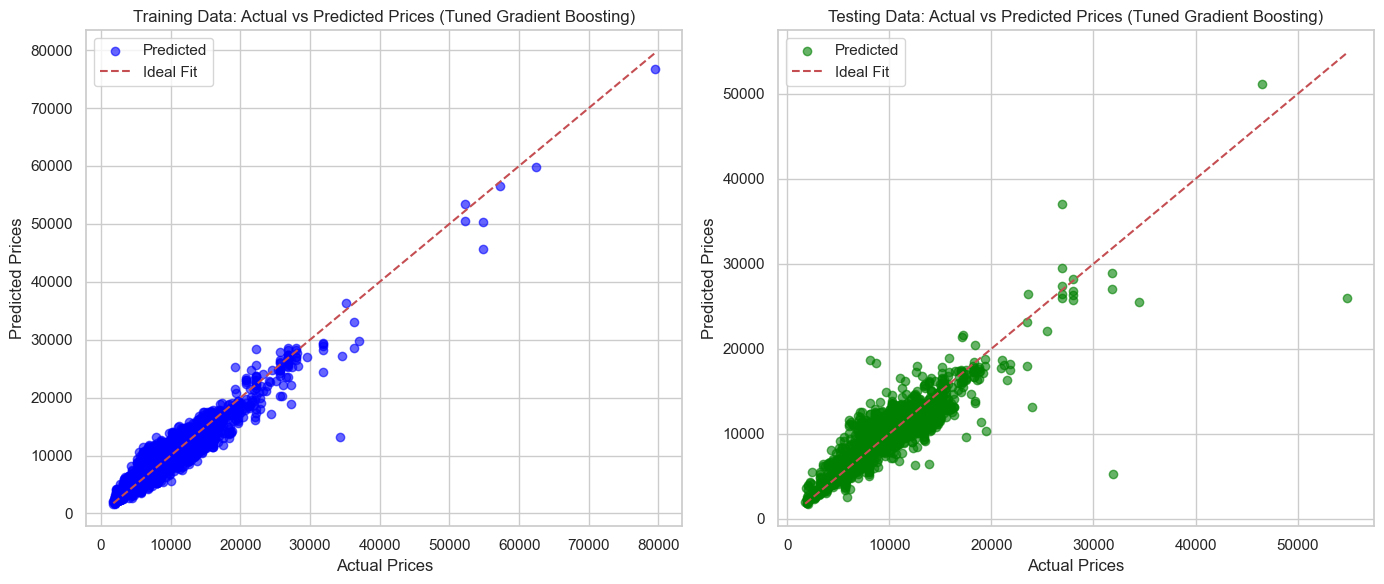

In [302]:
# Importing required libraries
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values for both training and testing data
plt.figure(figsize=(14, 6))

# Training data visualization
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_pred_gb_tuned, alpha=0.6, color="blue", label="Predicted")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], "r--", label="Ideal Fit")
plt.title("Training Data: Actual vs Predicted Prices (Tuned Gradient Boosting)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

# Testing data visualization
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_pred_gb_tuned, alpha=0.6, color="green", label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--", label="Ideal Fit")
plt.title("Testing Data: Actual vs Predicted Prices (Tuned Gradient Boosting)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

plt.tight_layout()
plt.show()


### This visualization compares the actual Flight prices with the predicted prices for both training (left) and testing (right) datasets.

In [304]:
import pickle

filename = 'Flight_Price_Prediction_Model.pkl'

# Save the best tuned model
with open(filename, 'wb') as file:
    pickle.dump(best_gb, file)

print(f"Model saved successfully as '{filename}'")


Model saved successfully as 'Flight_Price_Prediction_Model.pkl'


In [305]:
filename

'Flight_Price_Prediction_Model.pkl'

In [526]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,3,0,5,0,3897,24,3,22,20,1,10,5.141664
1,1,3,0,2,7662,1,5,5,50,13,15,6.100319
2,4,2,1,2,13882,9,6,9,25,4,25,7.039660
3,3,3,0,1,6218,12,5,18,5,23,30,5.786897
4,3,0,5,1,13302,1,3,16,50,21,35,5.655992


# Flight Price Prediction Project Report

# Objective

- The goal of this project was to build a machine learning model to predict flight ticket prices based on various factors like airline, departure time, duration, and more. This can help users understand ticket pricing patterns and make better purchasing decisions.

# Steps Followed

# 1. Business Problem Understanding

- We aimed to solve the problem of predicting flight prices accurately using historical data. This helps both customers and businesses make informed decisions.

# 2.Dataset Overview

#### The dataset we used Flight Price Prediction which includes the following features

- 1. Airline: this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
- 2. Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
- 3. Source: This column holds the name of the place from where the passenger’s journey will start.
- 4. Destination: This column holds the name of the place to where passengers wanted to travel.
- 5. Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
  6. Dep_Time:This column specifies the exact time of the flight's departure from the source location. 
- 7. Arrival_Time: Arrival time is when the passenger will reach his/her destination.
- 8. Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
- 9. Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
- 10. Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
- 11. Price: Price of the flight for a complete journey including all the expenses before onboarding.  

# 3. Basic Checks

- Loaded the dataset and performed basic checks like head(), info(),  describe() and more  to understand the data structure.

## Steps Taken:

### Handling Missing Values:

- Found missing values in Route and Total_Stops  columns and filled them using mode this is best for catagorical variables.           

### Handled Duplicate Data and Checked Data curruption

- During checking the duplicates we found there is 220 rows are duplicated so we droped them.

### Feature Extraction:

- During checking the data curruption we found some columns like - Date_of_Journey, Dep_Time Arrival_Time ,duration Represent journey and time information 
- so we converted those colums into datetime format for feature extraction.
-  Date_of_Journey: are converted  Date_of_Journey into day and month
-  Dep_Time: we converted  departure time into hours and minutes
-  Arrival_Time: we converted  the arrival time into hours and minutes.
-  we processed the Duration column to extract the total journey time in minutes.

### Exploratory Data Analysis (EDA)

- In this dataset we Analysed numerical and catagorial column using various plots and chekcs relation between two features. Also we Analysed Using univariate , Bivariate and multivariate by plotting the graphs and also we mentioned each insights below the graphs.

## Data Preprocessing

### Converting Categorical Data

the dataset included categories like
- Encoding Airline : We Used label encoding for each unique airline.
- Encoding Source and Destination  : we used label encoding for each unique city.                 
- Encoding Additional_Info  : we used label encoding for each unique
- Encoding Route : Used frequency encoding, as some routes may appear multiple times.
- We converted the Total_Stops column to numerical values using mapping

## Outlier Handling 

### Normalize Highly skewed Target column (Price ) by using Log Transformation
- In this dataset, we plotted the boxplot and found a few high outliers in flight prices, which could have distorted the model. We handled it with Log Transformation because Log Transformation reduced the impact of extreme outliers by compressing the range of data. It helped to normalize the distribution of highly skewed data

### handled Outlier Duration_Minutes feature

- Extreme outliers were found in Duration_Minutes, so we handled by using the IQR method

### handled Outlier Total_Stops feature
- some flights had too many stops so we handled outliers by using IQR method.

###  Challenges in Feature Selection

- We removed Route column because Total_stops already gives more impactful information which important for price prediction.
also we removed Additional_Info column because most of its values are the same, and it doesn’t help in predicting the price.
Route and Additional_Info are mostly useless data, so I dropped them.

###  Scaling:
- We scaled the features using Standard Scaler. This step ensures that all features are on a similar scale, which helps improve the performance of many machine learning models

## Model Selection


### Challenge: Choosing the best machine learning model

### Challenges Faced:
- Model Selection: Choosing the best model was difficult because some models showed overfitting or underfitting. Here is the reason why we did not choose other models for the final selection:
- Linear Regression, Ridge Regression, and Lasso Regression performed poorly on both training and testing data, and the models showed underfitting.
- Decision Tree Regressor performed well but had lower accuracy.
- Support Vector Regressor (SVR) performed very poorly on this dataset.
- K-Nearest Neighbors (KNR) had lower accuracy.
- Random Forest Regressor showed overfitting.
- Gradient Boosting Regressor performed well with a training score of 0.83 and a testing score of 0.79, showing low overfitting.
- XGBoost Regressor also provided good results with better performance than other models.

 ### Hyperparameter Tuning

- XGBoost Regressor and Gradient Boosting Regressor were selected for hyperparameter tuning.
- After hyperparameter tuning, XGBoost performed well and overcame the overfitting, but after further tuning, the results showed a decrease in performance. Therefore, we selected Gradient Boosting Regressor as the final model.

## Model Deployment

- Once the model was trained and Tunned, we saved the model using pickle. This allows us to load the model and make predictions on new, unseen data without retraining the model each time.

# Conclusion
- In this project, we focused on predicting flight prices using different machine learning models. After evaluating several models, we found that Gradient Boosting Regressor performed the best overall.
- Gradient Boosting Regressor was the best model for predicting flight prices after comparing multiple models. By tuning its parameters, we achieved a good balance between performance and generalization. The model is ready to predict flight prices for new, unseen data, and we can deploy it as needed without retraining it each time.

## Thank YOU....